### Importing Libraries

In [ ]:
import csv
import matplotlib.pyplot as plt
import collections
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sb
from datetime import datetime

### Importing Datasets

In [202]:
df1=pd.read_csv(r"C:\Users\ARTIKA SRIVASTAVA\Desktop\data\data_1.csv")
df2=pd.read_csv(r"C:\Users\ARTIKA SRIVASTAVA\Desktop\data\data_2.csv")
df3=pd.read_csv(r"C:\Users\ARTIKA SRIVASTAVA\Desktop\data\data_3.csv")

#### Display first 5 rows of dataset

In [203]:
df1.head()

Order ID  Order Date CustomerName           State       City
0  B-25601  04-01-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  04-01-2018        Pearl     Maharashtra       Pune
2  B-25603  04-03-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  04-03-2018       Divsha       Rajasthan     Jaipur
4  B-25605  04-05-2018      Kasheen     West Bengal    Kolkata

In [204]:
df2.head()

Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601    1275   -1148         7    Furniture         Bookcases
1  B-25601      66     -12         5     Clothing             Stole
2  B-25601       8      -2         3     Clothing       Hankerchief
3  B-25601      80     -56         4  Electronics  Electronic Games
4  B-25602     168    -111         2  Electronics            Phones

In [205]:
df3.head()

Month of Order Date   Category  Target
0              18-Apr  Furniture   10400
1              18-May  Furniture   10500
2              18-Jun  Furniture   10600
3              18-Jul  Furniture   10800
4              18-Aug  Furniture   10900

#### Check for Null Values

In [206]:
df1.isna().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

In [207]:
df2.isna().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

In [208]:
df3.isna().sum()

Month of Order Date    0
Category               0
Target                 0
dtype: int64

#### Making date column consistent in dataset1

In [ ]:
df1['Order Date'] = df1['Order Date'].str.replace('/','-')

In [131]:
df1

Order ID Order Date  CustomerName              State                City
0    B-25601 2018-01-04        Bharat            Gujarat           Ahmedabad
1    B-25602 2018-01-04         Pearl        Maharashtra                Pune
2    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal
3    B-25604 2018-03-04        Divsha          Rajasthan              Jaipur
4    B-25605 2018-05-04       Kasheen        West Bengal             Kolkata
5    B-25606 2018-06-04         Hazel          Karnataka           Bangalore
6    B-25607 2018-06-04      Sonakshi  Jammu and Kashmir             Kashmir
7    B-25608 2018-08-04       Aarushi         Tamil Nadu             Chennai
8    B-25609 2018-09-04        Jitesh      Uttar Pradesh             Lucknow
9    B-25610 2018-09-04        Yogesh              Bihar               Patna
10   B-25611 2018-11-04         Anita            Kerala   Thiruvananthapuram
11   B-25612 2018-12-04     Shrichand             Punjab          Chandigarh
12   B-25613 2018-12-04        Mukesh            Haryana          Chandigarh
13   B-25614 2018-04-13       Vandana   Himachal Pradesh               Simla
14   B-25615 2018-04-15        Bhavna             Sikkim             Gangtok
15   B-25616 2018-04-15         Kanak                Goa                 Goa
16   B-25617 2018-04-17         Sagar           Nagaland              Kohima
17   B-25618 2018-04-18         Manju     Andhra Pradesh           Hyderabad
18   B-25619 2018-04-18        Ramesh            Gujarat           Ahmedabad
19   B-25620 2018-04-20        Sarita        Maharashtra                Pune
20   B-25621 2018-04-20        Deepak     Madhya Pradesh              Bhopal
21   B-25622 2018-04-22       Monisha          Rajasthan              Jaipur
22   B-25623 2018-04-22        Atharv        West Bengal             Kolkata
23   B-25624 2018-04-22          Vini          Karnataka           Bangalore
24   B-25625 2018-04-23         Pinky  Jammu and Kashmir             Kashmir
25   B-25626 2018-04-23        Bhishm        Maharashtra              Mumbai
26   B-25627 2018-04-23        Hitika     Madhya Pradesh              Indore
27   B-25628 2018-04-24         Pooja              Bihar               Patna
28   B-25629 2018-04-24        Hemant            Kerala   Thiruvananthapuram
29   B-25630 2018-04-24         Sahil             Punjab          Chandigarh
30   B-25631 2018-04-24          Ritu            Haryana          Chandigarh
31   B-25632 2018-04-25        Manish   Himachal Pradesh               Simla
32   B-25633 2018-04-26          Amit             Sikkim             Gangtok
33   B-25634 2018-04-26        Sanjay                Goa                 Goa
34   B-25635 2018-04-26         Nidhi           Nagaland              Kohima
35   B-25636 2018-04-26         Nishi        Maharashtra              Mumbai
36   B-25637 2018-04-26         Ashmi     Madhya Pradesh              Indore
37   B-25638 2018-04-26         Parth        Maharashtra                Pune
38   B-25639 2018-04-27         Lisha     Madhya Pradesh              Bhopal
39   B-25640 2018-04-27       Paridhi          Rajasthan              Jaipur
40   B-25641 2018-04-27       Parishi        West Bengal             Kolkata
41   B-25642 2018-04-28          Ajay          Karnataka           Bangalore
42   B-25643 2018-04-29         Kirti  Jammu and Kashmir             Kashmir
43   B-25644 2018-04-30        Mayank        Maharashtra              Mumbai
44   B-25645 2018-01-05        Yaanvi     Madhya Pradesh              Indore
45   B-25646 2018-01-05         Sonal              Bihar               Patna
46   B-25647 2018-03-05        Sharda            Kerala   Thiruvananthapuram
47   B-25648 2018-04-05        Aditya             Punjab          Chandigarh
48   B-25649 2018-05-05        Rachna            Haryana          Chandigarh
49   B-25650 2018-06-05        Chirag        Maharashtra              Mumbai
50   B-25651 2018-07-05        Anurag     Madhya Pradesh              Indore


#### Convert Order Date to Date-time format

In [69]:
df1['Order Date']=pd.to_datetime(df1["Order Date"],format="%d-%m-%Y")

In [70]:
df1['Order Date'].min()

Timestamp('2018-01-04 00:00:00')

In [71]:
df1['Order Date'].max()

Timestamp('2019-12-03 00:00:00')

#### Create new dataframe with amount,profit and quantity of orders

In [72]:
new_df=df2[['Order ID','Amount','Profit','Quantity']]

In [73]:
new_df

Order ID  Amount  Profit  Quantity
0     B-25601    1275   -1148         7
1     B-25601      66     -12         5
2     B-25601       8      -2         3
3     B-25601      80     -56         4
4     B-25602     168    -111         2
5     B-25602     424    -272         5
6     B-25602    2617    1151         4
7     B-25602     561     212         3
8     B-25602     119      -5         8
9     B-25603    1355     -60         5
10    B-25603      24     -30         1
11    B-25603     193    -166         3
12    B-25603     180       5         3
13    B-25603     116      16         4
14    B-25603     107      36         6
15    B-25603      12       1         2
16    B-25603      38      18         1
17    B-25604      65      17         2
18    B-25604     157       5         9
19    B-25605      75       0         7
20    B-25606      87       4         2
21    B-25607      50      15         4
22    B-25608    1364   -1864         5
23    B-25608     476       0         3
24    B-25608     257      23         5
25    B-25608     856     385         6
26    B-25609     485      29         4
27    B-25609      25      -5         4
28    B-25610    1076     -38         4
29    B-25610     107     -54         4
30    B-25610      68     -55         5
31    B-25610     781    -594         6
32    B-25610      43       0         3
33    B-25610      30      -5         2
34    B-25611     160     -59         2
35    B-25612     259     -55         2
36    B-25613    1603       0         9
37    B-25614     494      54         4
38    B-25614      98     -12         2
39    B-25615      68      20         5
40    B-25616      42      12         5
41    B-25616     116     -56         5
42    B-25616      22      -2         3
43    B-25616      14      -2         3
44    B-25617     305    -270         5
45    B-25618     362     127         1
46    B-25618      12       0         2
47    B-25619     353      90         8
48    B-25620     193      46         1
49    B-25621     233     -10         5
50    B-25621     228      63         3
51    B-25621     333     -15         3
52    B-25622     534       0         3
53    B-25623      53       1         4
54    B-25623     158      69         3
55    B-25623     149     -87         4
56    B-25623     105      20         2
57    B-25624      26      12         3
58    B-25625      97      29         2
59    B-25625      59      30         3
60    B-25625     635    -349         5
61    B-25626      46     -14         1
62    B-25626    1103    -276         3
63    B-25627      55     -39         4
64    B-25628      45      13         4
65    B-25628      24      -9         4
66    B-25628      35      -8         2
67    B-25629    1560     421         3
68    B-25630     133      12         5
69    B-25630     114     -39         5
70    B-25630     143    -129         2
71    B-25630      40      -7         3
72    B-25630      34     -22         4
73    B-25630      42     -26         2
74    B-25631      89     -89         2
75    B-25632      19      -2         2
76    B-25633     249    -130         4
77    B-25633     711      -8         4
78    B-25633     496     -79         2
79    B-25634     389     -83         3
80    B-25635      40      16         3
81    B-25635      23       2         2
82    B-25635     382      30         3
83    B-25636     637     113         5
84    B-25637     117      14         3
85    B-25638     182     -11         3
86    B-25638     880      97         8
87    B-25638     154      39         3
88    B-25638     816     -96         3
89    B-25639    1629    -153         3
90    B-25640      68     -62         2
91    B-25640     314    -239        13
92    B-25640     122     -47         4
93    B-25641      22      -6         1
94    B-25642     434      26        11
95    B-25643    1061     -36         8
96    B-25643      50     -44         2
97    B-25643      37     -23         4
98    B-25643     263     -63         2
99   

#### Join the new dataframe with Orders dataset by taking Order ID as primary key

In [74]:
df_merged=pd.merge(df1, new_df, on='Order ID')

In [75]:
df_merged

Order ID Order Date  CustomerName              State                City  \
0     B-25601 2018-01-04        Bharat            Gujarat           Ahmedabad   
1     B-25601 2018-01-04        Bharat            Gujarat           Ahmedabad   
2     B-25601 2018-01-04        Bharat            Gujarat           Ahmedabad   
3     B-25601 2018-01-04        Bharat            Gujarat           Ahmedabad   
4     B-25602 2018-01-04         Pearl        Maharashtra                Pune   
5     B-25602 2018-01-04         Pearl        Maharashtra                Pune   
6     B-25602 2018-01-04         Pearl        Maharashtra                Pune   
7     B-25602 2018-01-04         Pearl        Maharashtra                Pune   
8     B-25602 2018-01-04         Pearl        Maharashtra                Pune   
9     B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
10    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
11    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
12    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
13    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
14    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
15    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
16    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
17    B-25604 2018-03-04        Divsha          Rajasthan              Jaipur   
18    B-25604 2018-03-04        Divsha          Rajasthan              Jaipur   
19    B-25605 2018-05-04       Kasheen        West Bengal             Kolkata   
20    B-25606 2018-06-04         Hazel          Karnataka           Bangalore   
21    B-25607 2018-06-04      Sonakshi  Jammu and Kashmir             Kashmir   
22    B-25608 2018-08-04       Aarushi         Tamil Nadu             Chennai   
23    B-25608 2018-08-04       Aarushi         Tamil Nadu             Chennai   
24    B-25608 2018-08-04       Aarushi         Tamil Nadu             Chennai   
25    B-25608 2018-08-04       Aarushi         Tamil Nadu             Chennai   
26    B-25609 2018-09-04        Jitesh      Uttar Pradesh             Lucknow   
27    B-25609 2018-09-04        Jitesh      Uttar Pradesh             Lucknow   
28    B-25610 2018-09-04        Yogesh              Bihar               Patna   
29    B-25610 2018-09-04        Yogesh              Bihar               Patna   
30    B-25610 2018-09-04        Yogesh              Bihar               Patna   
31    B-25610 2018-09-04        Yogesh              Bihar               Patna   
32    B-25610 2018-09-04        Yogesh              Bihar               Patna   
33    B-25610 2018-09-04        Yogesh              Bihar               Patna   
34    B-25611 2018-11-04         Anita            Kerala   Thiruvananthapuram   
35    B-25612 2018-12-04     Shrichand             Punjab          Chandigarh   
36    B-25613 2018-12-04        Mukesh            Haryana          Chandigarh   
37    B-25614 2018-04-13       Vandana   Himachal Pradesh               Simla   
38    B-25614 2018-04-13       Vandana   Himachal Pradesh               Simla   
39    B-25615 2018-04-15        Bhavna             Sikkim             Gangtok   
40    B-25616 2018-04-15         Kanak                Goa                 Goa   
41    B-25616 2018-04-15         Kanak                Goa                 Goa   
42    B-25616 2018-04-15         Kanak                Goa                 Goa   
43    B-25616 2018-04-15         Kanak                Goa                 Goa   
44    B-25617 2018-04-17         Sagar           Nagaland              Kohima   
45    B-25618 2018-04-18         Manju     Andhra Pradesh           Hyderabad   
46    B-25618 2018-04-18         Manju     Andhra Pradesh           Hyderabad   
47    B-25619 2018-04-18        Ramesh            Gujarat           Ahmedabad   
48    B-25620 2018-04-20        Sari

In [76]:
df_merged['Order Month']=pd.to_datetime(df1["Order Date"],format="%d-%m-%Y")

#### Calculate profit based on Order ID

In [77]:
OrderId_vs_profit=pd.DataFrame(df_merged.groupby('Order ID').sum()['Profit']).reset_index()

In [78]:
OrderId_vs_profit

Order ID  Profit
0    B-25601   -1218
1    B-25602     975
2    B-25603    -180
3    B-25604      22
4    B-25605       0
5    B-25606       4
6    B-25607      15
7    B-25608   -1456
8    B-25609      24
9    B-25610    -746
10   B-25611     -59
11   B-25612     -55
12   B-25613       0
13   B-25614      42
14   B-25615      20
15   B-25616     -48
16   B-25617    -270
17   B-25618     127
18   B-25619      90
19   B-25620      46
20   B-25621      38
21   B-25622       0
22   B-25623       3
23   B-25624      12
24   B-25625    -290
25   B-25626    -290
26   B-25627     -39
27   B-25628      -4
28   B-25629     421
29   B-25630    -211
30   B-25631     -89
31   B-25632      -2
32   B-25633    -217
33   B-25634     -83
34   B-25635      48
35   B-25636     113
36   B-25637      14
37   B-25638      29
38   B-25639    -153
39   B-25640    -348
40   B-25641      -6
41   B-25642      26
42   B-25643    -173
43   B-25644     -92
44   B-25645    -195
45   B-25646      -8
46   B-25647      -6
47   B-25648     -77
48   B-25649     -25
49   B-25650    -799
50   B-25651    -237
51   B-25652    -324
52   B-25653    -406
53   B-25654    -182
54   B-25655    -489
55   B-25656    1021
56   B-25657    -293
57   B-25658       9
58   B-25659      72
59   B-25660     -78
60   B-25661    -276
61   B-25662    -100
62   B-25663     138
63   B-25664    -223
64   B-25665    -113
65   B-25666    -916
66   B-25667     245
67   B-25668      17
68   B-25669     -66
69   B-25670      -4
70   B-25671       0
71   B-25672     -15
72   B-25673    -149
73   B-25674     -12
74   B-25675     -93
75   B-25676    -304
76   B-25677      -2
77   B-25678     -74
78   B-25679     -50
79   B-25680     -25
80   B-25681    -575
81   B-25682     -73
82   B-25683      76
83   B-25684      42
84   B-25685     112
85   B-25686    -572
86   B-25687     -48
87   B-25688    -345
88   B-25689    -406
89   B-25690      10
90   B-25691      22
91   B-25692      28
92   B-25693    -535
93   B-25694      43
94   B-25695      14
95   B-25696    -207
96   B-25697    -292
97   B-25698    -652
98   B-25699     -71
99   B-25700    -110
100  B-25701     -94
101  B-25702    -370
102  B-25703    -449
103  B-25704     -63
104  B-25705       0
105  B-25706     -11
106  B-25707      -6
107  B-25708    -146
108  B-25709     -18
109  B-25710    -134
110  B-25711     -58
111  B-25712    -275
112  B-25713     -63
113  B-25714      15
114  B-25715     137
115  B-25716       0
116  B-25717     193
117  B-25718     146
118  B-25719      10
119  B-25720     -35
120  B-25721      -7
121  B-25722      -8
122  B-25723     -97
123  B-25724     -51
124  B-25725     -17
125  B-25726    -128
126  B-25727      66
127  B-25728    -273
128  B-25729    -439
129  B-25730    -685
130  B-25731    -154
131  B-25732      -5
132  B-25733     -59
133  B-25734     -19
134  B-25735     -10
135  B-25736      -7
136  B-25737     -15
137  B-25738    -111
138  B-25739     -56
139  B-25740     -45
140  B-25741      -6
141  B-25742      -8
142  B-25743    -236
143  B-25744    -254
144  B-25745    -297
145  B-25746      16
146  B-25747     395
147  B-25748      46
148  B-25749     -82
149  B-25750    -278
150  B-25751     -58
151  B-25752     241
152  B-25753    -235
153  B-25754    -676
154  B-25755     354
155  B-25756    -870
156  B-25757      55
157  B-25758      -2
158  B-25759      -9
159  B-25760    -193
160  B-25761     984
161  B-25762    -528
162  B-25763     -52
163  B-25764    -134
164  B-25765      14
165  B-25766     -19
166  B-25767    -121
167  B-25768    -443
168  B-25769      -4
169  B-25770      48
170  B-25771      59
171  B-25772     106
172  B-25773    -257
173  B-25774      -6
174  B-25775     -17
175  B-25776     -20
176  B-25777    -159
177  B-25778    -553
178  B-25779    -980
179  B-25780     -41
180  B-25781    -900
181  B-25782     -22
182  B-25783     -42
183  B-25784       4
184  B-25785     121
185  B-25786     196
186  B-25787    -320
187  B-25788       3
188  B-25789     -99
189  B-25790  

#### Profit Vs Order ID Graph

In [79]:
from matplotlib.widgets import Slider

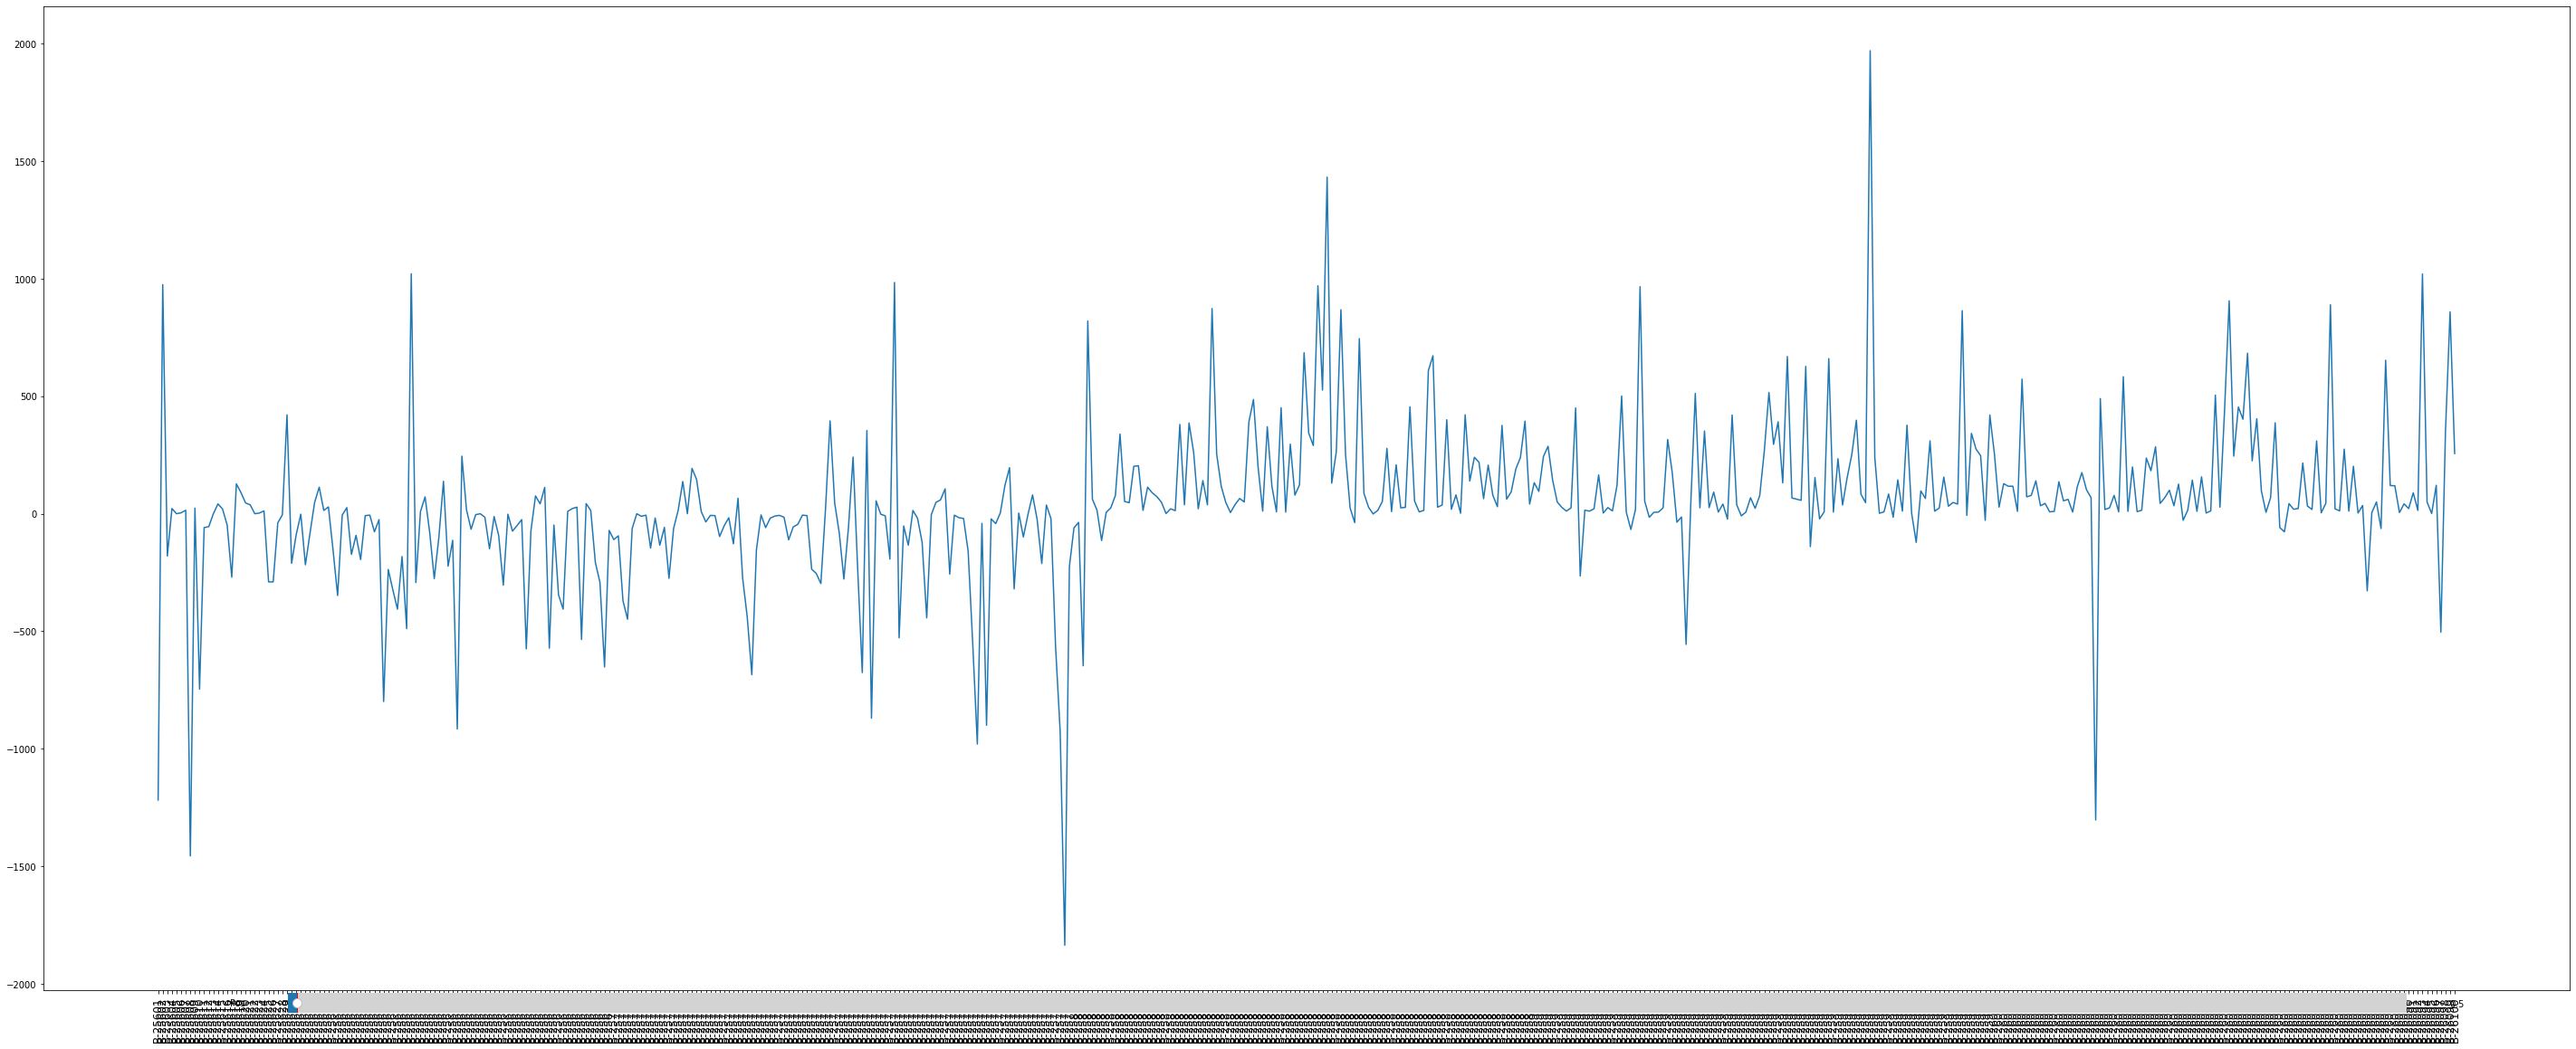

In [80]:
plt.figure(figsize=(50,20))
plt.plot(OrderId_vs_profit['Order ID'],OrderId_vs_profit['Profit'])
plt.xticks(rotation='vertical',size=12)
# Choose the Slider color
slider_color = 'White'
 
# Set the axis and slider position in the plot
axis_position = plt.axes([0.2, 0.1, 0.65, 0.03],
                         facecolor = slider_color)
slider_position = Slider(axis_position,
                         'Pos', 0.1, 90.0)
 
# update() function to change the graph when the
# slider is in use
def update(val):
    pos = slider_position.val
    Axis.axis([pos, pos+10, -1, 1])
    Plot.canvas.draw_idle()
 
# update function called using on_changed() function
slider_position.on_changed(update)
 
# Display the plot
plt.show()


#### Profit based on states

In [81]:
state_vs_profit=pd.DataFrame(df_merged.groupby('State').sum()['Profit'])

In [82]:
state_vs_profit.sort_values('Profit',ascending=False)

Profit
State                    
Maharashtra          6176
Madhya Pradesh       5551
Uttar Pradesh        3237
Delhi                2987
West Bengal          2500
Kerala               1871
Haryana              1325
Rajasthan            1257
Himachal Pradesh      656
Karnataka             645
Gujarat               465
Sikkim                401
Goa                   370
Nagaland              148
Jammu and Kashmir       8
Bihar                -321
Andhra Pradesh       -496
Punjab               -609
Tamil Nadu          -2216

#### Profit Vs State Graph

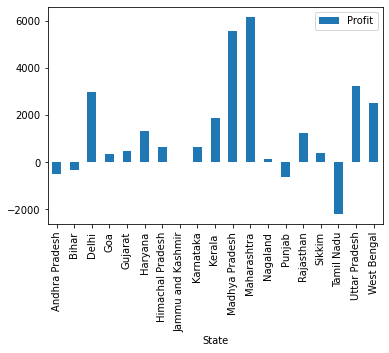

In [83]:
ax=state_vs_profit.plot.bar()

#### Profit Over a Period(monthly)

In [84]:
df_merged['month_year']=df_merged['Order Date'].apply(lambda x:x.strftime('%Y-%m'))

In [85]:
df_merged['month_year']

0       2018-01
1       2018-01
2       2018-01
3       2018-01
4       2018-01
5       2018-01
6       2018-01
7       2018-01
8       2018-01
9       2018-03
10      2018-03
11      2018-03
12      2018-03
13      2018-03
14      2018-03
15      2018-03
16      2018-03
17      2018-03
18      2018-03
19      2018-05
20      2018-06
21      2018-06
22      2018-08
23      2018-08
24      2018-08
25      2018-08
26      2018-09
27      2018-09
28      2018-09
29      2018-09
30      2018-09
31      2018-09
32      2018-09
33      2018-09
34      2018-11
35      2018-12
36      2018-12
37      2018-04
38      2018-04
39      2018-04
40      2018-04
41      2018-04
42      2018-04
43      2018-04
44      2018-04
45      2018-04
46      2018-04
47      2018-04
48      2018-04
49      2018-04
50      2018-04
51      2018-04
52      2018-04
53      2018-04
54      2018-04
55      2018-04
56      2018-04
57      2018-04
58      2018-04
59      2018-04
60      2018-04
61      2018-04
62      

In [86]:
month_vs_profit=df_merged.groupby('month_year').sum()['Profit'].reset_index()

In [87]:
month_vs_profit

month_year  Profit
0     2018-01   -3296
1     2018-02     685
2     2018-03     669
3     2018-04   -1043
4     2018-05    -891
5     2018-06   -3759
6     2018-07   -2065
7     2018-08   -1059
8     2018-09   -3509
9     2018-10    5979
10    2018-11    4955
11    2018-12    1535
12    2019-01    8655
13    2019-02    2291
14    2019-03    6633
15    2019-04    1295
16    2019-05     943
17    2019-06     700
18    2019-07     975
19    2019-08     594
20    2019-09    1597
21    2019-10    1892
22    2019-11     122
23    2019-12      57

#### Month Vs Profit Graph(2018-01-04---2019-12-03)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

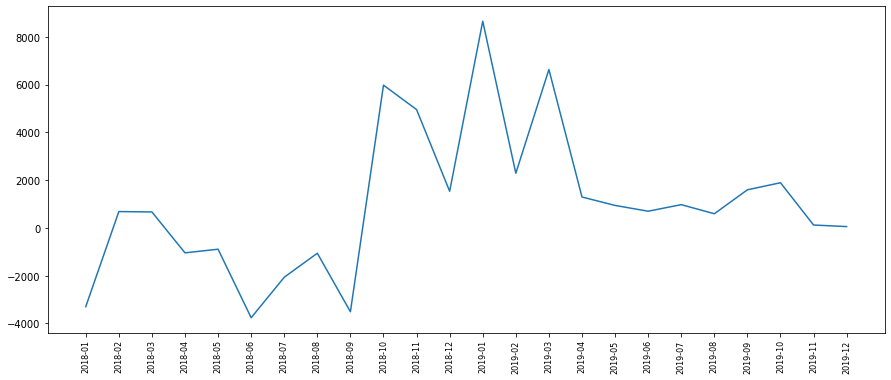

In [88]:
plt.figure(figsize=(15,6))
plt.plot(month_vs_profit['month_year'],month_vs_profit['Profit'])
plt.xticks(rotation='vertical',size=8)

In [89]:
pd.set_option('display.max_rows', None)

In [90]:
customer_vs_quantity=pd.DataFrame(df_merged.groupby(['month_year','Order ID']).sum()['Quantity'])

In [91]:
customer_vs_quantity

Quantity
month_year Order ID          
2018-01    B-25601         19
           B-25602         22
           B-25645         14
           B-25646          2
           B-25676         18
           B-25706          4
           B-25707          1
           B-25708         22
           B-25709          8
           B-25737          3
           B-25768          6
           B-25798         26
           B-25799         14
           B-25800         19
           B-25801         11
           B-25841          2
           B-25887         12
2018-02    B-25677          1
           B-25738         13
           B-25769          2
           B-25770         18
           B-25771          3
           B-25772          4
           B-25842          8
           B-25888          9
2018-03    B-25603         25
           B-25604         11
           B-25647          4
           B-25678          8
           B-25739          2
           B-25740          7
           B-25741          7
           B-25742          2
           B-25843         19
           B-25844          2
           B-25845         15
           B-25846          7
           B-25847         12
           B-25848         11
           B-25889         12
2018-04    B-25614          6
           B-25615          5
           B-25616         16
           B-25617          5
           B-25618          3
           B-25619          8
           B-25620          1
           B-25621         11
           B-25622          3
           B-25623         13
           B-25624          3
           B-25625         10
           B-25626          4
           B-25627          4
           B-25628         10
           B-25629          3
           B-25630         21
           B-25631          2
           B-25632          2
           B-25633         10
           B-25634          3
           B-25635          8
           B-25636          5
           B-25637          3
           B-25638         17
           B-25639          3
           B-25640         19
           B-25641          1
           B-25642         11
           B-25643         17
           B-25644          8
           B-25648         10
           B-25679          1
           B-25680          3
           B-25681         23
           B-25849          3
           B-25890          9
           B-25891         13
           B-25892          3
           B-25893         32
           B-25894          3
           B-25895          2
2018-05    B-25605          7
           B-25649          2
           B-25657         19
           B-25658          2
           B-25659          7
           B-25660          3
           B-25661         17
           B-25662         14
           B-25663          2
           B-25664          9
           B-25665          4
           B-25666          7
           B-25667         24
           B-25668          3
           B-25669          2
           B-25670          8
           B-25671          3
           B-25672          1
           B-25673         18
           B-25674          5
           B-25675          9
           B-25710         23
           B-25802         21
           B-25803         25
           B-25804          8
           B-25805          2
           B-25850         36
           B-25896         25
2018-06    B-25606          2
           B-25607          4
           B-25650         31
           B-25689          8
           B-25690          3
           B-25691         10
           B-25692          7
           B-25693         30
           B-25694          7
           B-25695          9
           B-25696         17
           B-25697         24
           B-25698         23
           B-25699          9
           B-25700         10
           B-25701         12
           B-25702         22
           B-25703         39
           B-25704          6
           B-25705          2
           B-25711          4
           B-25773         14
 

#### Which category is selling most

In [92]:
most_sell_prod_category=pd.DataFrame(df2.groupby('Category').sum()['Quantity'])

In [93]:
most_sell_prod_category.sort_values('Quantity',ascending=False)

Quantity
Category             
Clothing         3516
Electronics      1154
Furniture         945

#### Which category is selling most-Graph

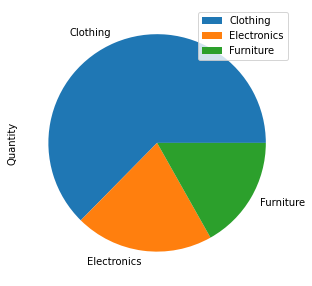

In [94]:
plot = most_sell_prod_category.plot.pie(y='Quantity', figsize=(5, 5))

#### Which category and subcategory are most in demand

In [95]:
cat_subcat_profit=pd.DataFrame(df2.groupby(['Category','Sub-Category']).sum()['Profit'])

In [96]:
cat_subcat_profit.sort_values(['Category','Profit'],ascending=False)

Profit
Category    Sub-Category            
Furniture   Bookcases           4888
            Furnishings          844
            Chairs               577
            Tables             -4011
Electronics Printers            5964
            Accessories         3559
            Phones              2207
            Electronic Games   -1236
Clothing    Trousers            2847
            Stole               2559
            Hankerchief         2098
            T-shirt             1500
            Shirt               1131
            Saree                352
            Leggings             260
            Skirt                235
            Kurti                181

In [97]:
df3.head()

Category  Target target_month_year
0  Furniture   10400           2018-04
1  Furniture   10500           2018-05
2  Furniture   10600           2018-06
3  Furniture   10800           2018-07
4  Furniture   10900           2018-08

In [98]:
df3

Category  Target target_month_year
0     Furniture   10400           2018-04
1     Furniture   10500           2018-05
2     Furniture   10600           2018-06
3     Furniture   10800           2018-07
4     Furniture   10900           2018-08
5     Furniture   11000           2018-09
6     Furniture   11100           2018-10
7     Furniture   11300           2018-11
8     Furniture   11400           2018-12
9     Furniture   11500           2019-01
10    Furniture   11600           2019-02
11    Furniture   11800           2019-03
12     Clothing   12000           2018-04
13     Clothing   12000           2018-05
14     Clothing   12000           2018-06
15     Clothing   14000           2018-07
16     Clothing   14000           2018-08
17     Clothing   14000           2018-09
18     Clothing   16000           2018-10
19     Clothing   16000           2018-11
20     Clothing   16000           2018-12
21     Clothing   16000           2019-01
22     Clothing   16000           2019-02
23     Clothing   16000           2019-03
24  Electronics    9000           2018-04
25  Electronics    9000           2018-05
26  Electronics    9000           2018-06
27  Electronics    9000           2018-07
28  Electronics    9000           2018-08
29  Electronics    9000           2018-09
30  Electronics    9000           2018-10
31  Electronics    9000           2018-11
32  Electronics    9000           2018-12
33  Electronics   16000           2019-01
34  Electronics   16000           2019-02
35  Electronics   16000           2019-03

#### Extracting Month and Year from Date Column

In [209]:
df3['Month of Order Date'] = df3['Month of Order Date'].str.replace('-','/')

In [100]:
df3

Category  Target target_month_year
0     Furniture   10400           2018-04
1     Furniture   10500           2018-05
2     Furniture   10600           2018-06
3     Furniture   10800           2018-07
4     Furniture   10900           2018-08
5     Furniture   11000           2018-09
6     Furniture   11100           2018-10
7     Furniture   11300           2018-11
8     Furniture   11400           2018-12
9     Furniture   11500           2019-01
10    Furniture   11600           2019-02
11    Furniture   11800           2019-03
12     Clothing   12000           2018-04
13     Clothing   12000           2018-05
14     Clothing   12000           2018-06
15     Clothing   14000           2018-07
16     Clothing   14000           2018-08
17     Clothing   14000           2018-09
18     Clothing   16000           2018-10
19     Clothing   16000           2018-11
20     Clothing   16000           2018-12
21     Clothing   16000           2019-01
22     Clothing   16000           2019-02
23     Clothing   16000           2019-03
24  Electronics    9000           2018-04
25  Electronics    9000           2018-05
26  Electronics    9000           2018-06
27  Electronics    9000           2018-07
28  Electronics    9000           2018-08
29  Electronics    9000           2018-09
30  Electronics    9000           2018-10
31  Electronics    9000           2018-11
32  Electronics    9000           2018-12
33  Electronics   16000           2019-01
34  Electronics   16000           2019-02
35  Electronics   16000           2019-03

In [210]:
d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

def month_extract(date):
 mon=date[-3:]
 return  d[mon]

def year_extract(date):
 return "20"+date[0:2]

def final_month_year(date):
    return year_extract(date)+"-"+str(month_extract(date))

df3['month']=df3['Month of Order Date'].apply(month_extract)
df3['year']=df3['Month of Order Date'].apply(year_extract)
df3['target_month_year']=df3['Month of Order Date'].apply(final_month_year)

In [102]:
df3

Category  Target target_month_year
0     Furniture   10400           2018-04
1     Furniture   10500           2018-05
2     Furniture   10600           2018-06
3     Furniture   10800           2018-07
4     Furniture   10900           2018-08
5     Furniture   11000           2018-09
6     Furniture   11100           2018-10
7     Furniture   11300           2018-11
8     Furniture   11400           2018-12
9     Furniture   11500           2019-01
10    Furniture   11600           2019-02
11    Furniture   11800           2019-03
12     Clothing   12000           2018-04
13     Clothing   12000           2018-05
14     Clothing   12000           2018-06
15     Clothing   14000           2018-07
16     Clothing   14000           2018-08
17     Clothing   14000           2018-09
18     Clothing   16000           2018-10
19     Clothing   16000           2018-11
20     Clothing   16000           2018-12
21     Clothing   16000           2019-01
22     Clothing   16000           2019-02
23     Clothing   16000           2019-03
24  Electronics    9000           2018-04
25  Electronics    9000           2018-05
26  Electronics    9000           2018-06
27  Electronics    9000           2018-07
28  Electronics    9000           2018-08
29  Electronics    9000           2018-09
30  Electronics    9000           2018-10
31  Electronics    9000           2018-11
32  Electronics    9000           2018-12
33  Electronics   16000           2019-01
34  Electronics   16000           2019-02
35  Electronics   16000           2019-03

In [139]:
df3['Target']

0     10400
1     10500
2     10600
3     10800
4     10900
5     11000
6     11100
7     11300
8     11400
9     11500
10    11600
11    11800
12    12000
13    12000
14    12000
15    14000
16    14000
17    14000
18    16000
19    16000
20    16000
21    16000
22    16000
23    16000
24     9000
25     9000
26     9000
27     9000
28     9000
29     9000
30     9000
31     9000
32     9000
33    16000
34    16000
35    16000
Name: Target, dtype: int64

In [104]:
df3.drop(['month','year'],axis=1,inplace=True)

KeyError: "['month', 'year'] not found in axis"

In [105]:
df3

Category  Target target_month_year
0     Furniture   10400           2018-04
1     Furniture   10500           2018-05
2     Furniture   10600           2018-06
3     Furniture   10800           2018-07
4     Furniture   10900           2018-08
5     Furniture   11000           2018-09
6     Furniture   11100           2018-10
7     Furniture   11300           2018-11
8     Furniture   11400           2018-12
9     Furniture   11500           2019-01
10    Furniture   11600           2019-02
11    Furniture   11800           2019-03
12     Clothing   12000           2018-04
13     Clothing   12000           2018-05
14     Clothing   12000           2018-06
15     Clothing   14000           2018-07
16     Clothing   14000           2018-08
17     Clothing   14000           2018-09
18     Clothing   16000           2018-10
19     Clothing   16000           2018-11
20     Clothing   16000           2018-12
21     Clothing   16000           2019-01
22     Clothing   16000           2019-02
23     Clothing   16000           2019-03
24  Electronics    9000           2018-04
25  Electronics    9000           2018-05
26  Electronics    9000           2018-06
27  Electronics    9000           2018-07
28  Electronics    9000           2018-08
29  Electronics    9000           2018-09
30  Electronics    9000           2018-10
31  Electronics    9000           2018-11
32  Electronics    9000           2018-12
33  Electronics   16000           2019-01
34  Electronics   16000           2019-02
35  Electronics   16000           2019-03

In [106]:
df3['target_month_year']=pd.to_datetime(df3["target_month_year"],format="%Y-%m")

In [107]:
df3['target_month_year']=df3['target_month_year'].apply(lambda x:x.strftime('%Y-%m'))

In [108]:
df3

Category  Target target_month_year
0     Furniture   10400           2018-04
1     Furniture   10500           2018-05
2     Furniture   10600           2018-06
3     Furniture   10800           2018-07
4     Furniture   10900           2018-08
5     Furniture   11000           2018-09
6     Furniture   11100           2018-10
7     Furniture   11300           2018-11
8     Furniture   11400           2018-12
9     Furniture   11500           2019-01
10    Furniture   11600           2019-02
11    Furniture   11800           2019-03
12     Clothing   12000           2018-04
13     Clothing   12000           2018-05
14     Clothing   12000           2018-06
15     Clothing   14000           2018-07
16     Clothing   14000           2018-08
17     Clothing   14000           2018-09
18     Clothing   16000           2018-10
19     Clothing   16000           2018-11
20     Clothing   16000           2018-12
21     Clothing   16000           2019-01
22     Clothing   16000           2019-02
23     Clothing   16000           2019-03
24  Electronics    9000           2018-04
25  Electronics    9000           2018-05
26  Electronics    9000           2018-06
27  Electronics    9000           2018-07
28  Electronics    9000           2018-08
29  Electronics    9000           2018-09
30  Electronics    9000           2018-10
31  Electronics    9000           2018-11
32  Electronics    9000           2018-12
33  Electronics   16000           2019-01
34  Electronics   16000           2019-02
35  Electronics   16000           2019-03

#### Which category is selling most

In [109]:
df_new1=pd.merge(df1,df2, on='Order ID')

In [110]:
df_new1

Order ID Order Date  CustomerName              State                City  \
0     B-25601 2018-01-04        Bharat            Gujarat           Ahmedabad   
1     B-25601 2018-01-04        Bharat            Gujarat           Ahmedabad   
2     B-25601 2018-01-04        Bharat            Gujarat           Ahmedabad   
3     B-25601 2018-01-04        Bharat            Gujarat           Ahmedabad   
4     B-25602 2018-01-04         Pearl        Maharashtra                Pune   
5     B-25602 2018-01-04         Pearl        Maharashtra                Pune   
6     B-25602 2018-01-04         Pearl        Maharashtra                Pune   
7     B-25602 2018-01-04         Pearl        Maharashtra                Pune   
8     B-25602 2018-01-04         Pearl        Maharashtra                Pune   
9     B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
10    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
11    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
12    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
13    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
14    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
15    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
16    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
17    B-25604 2018-03-04        Divsha          Rajasthan              Jaipur   
18    B-25604 2018-03-04        Divsha          Rajasthan              Jaipur   
19    B-25605 2018-05-04       Kasheen        West Bengal             Kolkata   
20    B-25606 2018-06-04         Hazel          Karnataka           Bangalore   
21    B-25607 2018-06-04      Sonakshi  Jammu and Kashmir             Kashmir   
22    B-25608 2018-08-04       Aarushi         Tamil Nadu             Chennai   
23    B-25608 2018-08-04       Aarushi         Tamil Nadu             Chennai   
24    B-25608 2018-08-04       Aarushi         Tamil Nadu             Chennai   
25    B-25608 2018-08-04       Aarushi         Tamil Nadu             Chennai   
26    B-25609 2018-09-04        Jitesh      Uttar Pradesh             Lucknow   
27    B-25609 2018-09-04        Jitesh      Uttar Pradesh             Lucknow   
28    B-25610 2018-09-04        Yogesh              Bihar               Patna   
29    B-25610 2018-09-04        Yogesh              Bihar               Patna   
30    B-25610 2018-09-04        Yogesh              Bihar               Patna   
31    B-25610 2018-09-04        Yogesh              Bihar               Patna   
32    B-25610 2018-09-04        Yogesh              Bihar               Patna   
33    B-25610 2018-09-04        Yogesh              Bihar               Patna   
34    B-25611 2018-11-04         Anita            Kerala   Thiruvananthapuram   
35    B-25612 2018-12-04     Shrichand             Punjab          Chandigarh   
36    B-25613 2018-12-04        Mukesh            Haryana          Chandigarh   
37    B-25614 2018-04-13       Vandana   Himachal Pradesh               Simla   
38    B-25614 2018-04-13       Vandana   Himachal Pradesh               Simla   
39    B-25615 2018-04-15        Bhavna             Sikkim             Gangtok   
40    B-25616 2018-04-15         Kanak                Goa                 Goa   
41    B-25616 2018-04-15         Kanak                Goa                 Goa   
42    B-25616 2018-04-15         Kanak                Goa                 Goa   
43    B-25616 2018-04-15         Kanak                Goa                 Goa   
44    B-25617 2018-04-17         Sagar           Nagaland              Kohima   
45    B-25618 2018-04-18         Manju     Andhra Pradesh           Hyderabad   
46    B-25618 2018-04-18         Manju     Andhra Pradesh           Hyderabad   
47    B-25619 2018-04-18        Ramesh            Gujarat           Ahmedabad   
48    B-25620 2018-04-20        Sari

In [111]:
df_new1['Order Date']=df_new1['Order Date'].apply(lambda x:x.strftime('%Y-%m'))

In [112]:
df_new1

Order ID Order Date  CustomerName              State                City  \
0     B-25601    2018-01        Bharat            Gujarat           Ahmedabad   
1     B-25601    2018-01        Bharat            Gujarat           Ahmedabad   
2     B-25601    2018-01        Bharat            Gujarat           Ahmedabad   
3     B-25601    2018-01        Bharat            Gujarat           Ahmedabad   
4     B-25602    2018-01         Pearl        Maharashtra                Pune   
5     B-25602    2018-01         Pearl        Maharashtra                Pune   
6     B-25602    2018-01         Pearl        Maharashtra                Pune   
7     B-25602    2018-01         Pearl        Maharashtra                Pune   
8     B-25602    2018-01         Pearl        Maharashtra                Pune   
9     B-25603    2018-03         Jahan     Madhya Pradesh              Bhopal   
10    B-25603    2018-03         Jahan     Madhya Pradesh              Bhopal   
11    B-25603    2018-03         Jahan     Madhya Pradesh              Bhopal   
12    B-25603    2018-03         Jahan     Madhya Pradesh              Bhopal   
13    B-25603    2018-03         Jahan     Madhya Pradesh              Bhopal   
14    B-25603    2018-03         Jahan     Madhya Pradesh              Bhopal   
15    B-25603    2018-03         Jahan     Madhya Pradesh              Bhopal   
16    B-25603    2018-03         Jahan     Madhya Pradesh              Bhopal   
17    B-25604    2018-03        Divsha          Rajasthan              Jaipur   
18    B-25604    2018-03        Divsha          Rajasthan              Jaipur   
19    B-25605    2018-05       Kasheen        West Bengal             Kolkata   
20    B-25606    2018-06         Hazel          Karnataka           Bangalore   
21    B-25607    2018-06      Sonakshi  Jammu and Kashmir             Kashmir   
22    B-25608    2018-08       Aarushi         Tamil Nadu             Chennai   
23    B-25608    2018-08       Aarushi         Tamil Nadu             Chennai   
24    B-25608    2018-08       Aarushi         Tamil Nadu             Chennai   
25    B-25608    2018-08       Aarushi         Tamil Nadu             Chennai   
26    B-25609    2018-09        Jitesh      Uttar Pradesh             Lucknow   
27    B-25609    2018-09        Jitesh      Uttar Pradesh             Lucknow   
28    B-25610    2018-09        Yogesh              Bihar               Patna   
29    B-25610    2018-09        Yogesh              Bihar               Patna   
30    B-25610    2018-09        Yogesh              Bihar               Patna   
31    B-25610    2018-09        Yogesh              Bihar               Patna   
32    B-25610    2018-09        Yogesh              Bihar               Patna   
33    B-25610    2018-09        Yogesh              Bihar               Patna   
34    B-25611    2018-11         Anita            Kerala   Thiruvananthapuram   
35    B-25612    2018-12     Shrichand             Punjab          Chandigarh   
36    B-25613    2018-12        Mukesh            Haryana          Chandigarh   
37    B-25614    2018-04       Vandana   Himachal Pradesh               Simla   
38    B-25614    2018-04       Vandana   Himachal Pradesh               Simla   
39    B-25615    2018-04        Bhavna             Sikkim             Gangtok   
40    B-25616    2018-04         Kanak                Goa                 Goa   
41    B-25616    2018-04         Kanak                Goa                 Goa   
42    B-25616    2018-04         Kanak                Goa                 Goa   
43    B-25616    2018-04         Kanak                Goa                 Goa   
44    B-25617    2018-04         Sagar           Nagaland              Kohima   
45    B-25618    2018-04         Manju     Andhra Pradesh           Hyderabad   
46    B-25618    2018-04         Manju     Andhra Pradesh           Hyderabad   
47    B-25619    2018-04        Ramesh            Gujarat           Ahmedabad   
48    B-25620    2018-04        Sari

In [113]:
cat_sales_amount=pd.DataFrame(df_new1.groupby(['Order Date','Category']).sum()['Amount'])

In [114]:
cat_sales_amount

Amount
Order Date Category           
2018-01    Clothing       5355
           Electronics    7624
           Furniture      5056
2018-02    Clothing       1662
           Electronics    3763
           Furniture      1141
2018-03    Clothing       3521
           Electronics    3345
           Furniture       568
2018-04    Clothing      10743
           Electronics    8857
           Furniture      6570
2018-05    Clothing       6986
           Electronics    8759
           Furniture      4677
2018-06    Clothing       7238
           Electronics    6546
           Furniture      3622
2018-07    Clothing       4020
           Electronics    6413
           Furniture      5249
2018-08    Clothing      13270
           Electronics   16740
           Furniture     15259
2018-09    Clothing       8414
           Electronics    5068
           Furniture      6728
2018-10    Clothing      11761
           Electronics   15537
           Furniture      5460
2018-11    Clothing      15862
           Electronics   10531
           Furniture     12465
2018-12    Clothing       5769
           Electronics   11915
           Furniture      6208
2019-01    Clothing      11867
           Electronics   22637
           Furniture     15944
2019-02    Clothing       4507
           Electronics    6693
           Furniture      4694
2019-03    Clothing      14411
           Electronics   15146
           Furniture     10143
2019-04    Clothing       2654
           Electronics     727
           Furniture      7698
2019-05    Clothing       1503
           Electronics    1616
           Furniture      1271
2019-06    Clothing       1084
           Electronics    1711
           Furniture       597
2019-07    Clothing       1195
           Electronics    2427
           Furniture      1494
2019-08    Clothing       2149
           Electronics    1582
           Furniture      2826
2019-09    Clothing       1371
           Electronics    2941
           Furniture      1271
2019-10    Clothing       3077
           Electronics    3251
           Furniture      7819
2019-11    Clothing        522
           Electronics    1292
           Furniture       421
2019-12    Clothing        113
           Electronics     146

In [76]:
cat_sales_amount.groupby('Category')

In [77]:
cat_sales_amount

Order Date     Category  Amount
0     2018-01     Clothing    5355
1     2018-01  Electronics    7624
2     2018-01    Furniture    5056
3     2018-02     Clothing    1662
4     2018-02  Electronics    3763
5     2018-02    Furniture    1141
6     2018-03     Clothing    3521
7     2018-03  Electronics    3345
8     2018-03    Furniture     568
9     2018-04     Clothing   10743
10    2018-04  Electronics    8857
11    2018-04    Furniture    6570
12    2018-05     Clothing    6986
13    2018-05  Electronics    8759
14    2018-05    Furniture    4677
15    2018-06     Clothing    7238
16    2018-06  Electronics    6546
17    2018-06    Furniture    3622
18    2018-07     Clothing    4020
19    2018-07  Electronics    6413
20    2018-07    Furniture    5249
21    2018-08     Clothing   13270
22    2018-08  Electronics   16740
23    2018-08    Furniture   15259
24    2018-09     Clothing    8414
25    2018-09  Electronics    5068
26    2018-09    Furniture    6728
27    2018-10     Clothing   11761
28    2018-10  Electronics   15537
29    2018-10    Furniture    5460
30    2018-11     Clothing   15862
31    2018-11  Electronics   10531
32    2018-11    Furniture   12465
33    2018-12     Clothing    5769
34    2018-12  Electronics   11915
35    2018-12    Furniture    6208
36    2019-01     Clothing   11867
37    2019-01  Electronics   22637
38    2019-01    Furniture   15944
39    2019-02     Clothing    4507
40    2019-02  Electronics    6693
41    2019-02    Furniture    4694
42    2019-03     Clothing   14411
43    2019-03  Electronics   15146
44    2019-03    Furniture   10143
45    2019-04     Clothing    2654
46    2019-04  Electronics     727
47    2019-04    Furniture    7698
48    2019-05     Clothing    1503
49    2019-05  Electronics    1616
50    2019-05    Furniture    1271
51    2019-06     Clothing    1084
52    2019-06  Electronics    1711
53    2019-06    Furniture     597
54    2019-07     Clothing    1195
55    2019-07  Electronics    2427
56    2019-07    Furniture    1494
57    2019-08     Clothing    2149
58    2019-08  Electronics    1582
59    2019-08    Furniture    2826
60    2019-09     Clothing    1371
61    2019-09  Electronics    2941
62    2019-09    Furniture    1271
63    2019-10     Clothing    3077
64    2019-10  Electronics    3251
65    2019-10    Furniture    7819
66    2019-11     Clothing     522
67    2019-11  Electronics    1292
68    2019-11    Furniture     421
69    2019-12     Clothing     113
70    2019-12  Electronics     146

In [83]:
clothing_df=pd.DataFrame(cat_sales_amount.groupby(['Order Date']).apply(lambda x: x[x['Category'] == 'Clothing' ]))

In [84]:
clothing_df

Order Date  Category  Amount
Order Date                                
2018-01    0     2018-01  Clothing    5355
2018-02    3     2018-02  Clothing    1662
2018-03    6     2018-03  Clothing    3521
2018-04    9     2018-04  Clothing   10743
2018-05    12    2018-05  Clothing    6986
2018-06    15    2018-06  Clothing    7238
2018-07    18    2018-07  Clothing    4020
2018-08    21    2018-08  Clothing   13270
2018-09    24    2018-09  Clothing    8414
2018-10    27    2018-10  Clothing   11761
2018-11    30    2018-11  Clothing   15862
2018-12    33    2018-12  Clothing    5769
2019-01    36    2019-01  Clothing   11867
2019-02    39    2019-02  Clothing    4507
2019-03    42    2019-03  Clothing   14411
2019-04    45    2019-04  Clothing    2654
2019-05    48    2019-05  Clothing    1503
2019-06    51    2019-06  Clothing    1084
2019-07    54    2019-07  Clothing    1195
2019-08    57    2019-08  Clothing    2149
2019-09    60    2019-09  Clothing    1371
2019-10    63    2019-10  Clothing    3077
2019-11    66    2019-11  Clothing     522
2019-12    69    2019-12  Clothing     113

In [94]:
clothing_df['dates']=clothing_df['Order Date']

In [95]:
clothing_df

Order Date  Category  Amount    dates
Order Date                                         
2018-01    0     2018-01  Clothing    5355  2018-01
2018-02    3     2018-02  Clothing    1662  2018-02
2018-03    6     2018-03  Clothing    3521  2018-03
2018-04    9     2018-04  Clothing   10743  2018-04
2018-05    12    2018-05  Clothing    6986  2018-05
2018-06    15    2018-06  Clothing    7238  2018-06
2018-07    18    2018-07  Clothing    4020  2018-07
2018-08    21    2018-08  Clothing   13270  2018-08
2018-09    24    2018-09  Clothing    8414  2018-09
2018-10    27    2018-10  Clothing   11761  2018-10
2018-11    30    2018-11  Clothing   15862  2018-11
2018-12    33    2018-12  Clothing    5769  2018-12
2019-01    36    2019-01  Clothing   11867  2019-01
2019-02    39    2019-02  Clothing    4507  2019-02
2019-03    42    2019-03  Clothing   14411  2019-03
2019-04    45    2019-04  Clothing    2654  2019-04
2019-05    48    2019-05  Clothing    1503  2019-05
2019-06    51    2019-06  Clothing    1084  2019-06
2019-07    54    2019-07  Clothing    1195  2019-07
2019-08    57    2019-08  Clothing    2149  2019-08
2019-09    60    2019-09  Clothing    1371  2019-09
2019-10    63    2019-10  Clothing    3077  2019-10
2019-11    66    2019-11  Clothing     522  2019-11
2019-12    69    2019-12  Clothing     113  2019-12

In [96]:
clothing_df.drop(['Order Date'],axis=1,inplace=True)

In [97]:
clothing_df

Category  Amount    dates
Order Date                              
2018-01    0   Clothing    5355  2018-01
2018-02    3   Clothing    1662  2018-02
2018-03    6   Clothing    3521  2018-03
2018-04    9   Clothing   10743  2018-04
2018-05    12  Clothing    6986  2018-05
2018-06    15  Clothing    7238  2018-06
2018-07    18  Clothing    4020  2018-07
2018-08    21  Clothing   13270  2018-08
2018-09    24  Clothing    8414  2018-09
2018-10    27  Clothing   11761  2018-10
2018-11    30  Clothing   15862  2018-11
2018-12    33  Clothing    5769  2018-12
2019-01    36  Clothing   11867  2019-01
2019-02    39  Clothing    4507  2019-02
2019-03    42  Clothing   14411  2019-03
2019-04    45  Clothing    2654  2019-04
2019-05    48  Clothing    1503  2019-05
2019-06    51  Clothing    1084  2019-06
2019-07    54  Clothing    1195  2019-07
2019-08    57  Clothing    2149  2019-08
2019-09    60  Clothing    1371  2019-09
2019-10    63  Clothing    3077  2019-10
2019-11    66  Clothing     522  2019-11
2019-12    69  Clothing     113  2019-12

In [116]:
df3

Category  Target target_month_year
0     Furniture   10400           2018-04
1     Furniture   10500           2018-05
2     Furniture   10600           2018-06
3     Furniture   10800           2018-07
4     Furniture   10900           2018-08
5     Furniture   11000           2018-09
6     Furniture   11100           2018-10
7     Furniture   11300           2018-11
8     Furniture   11400           2018-12
9     Furniture   11500           2019-01
10    Furniture   11600           2019-02
11    Furniture   11800           2019-03
12     Clothing   12000           2018-04
13     Clothing   12000           2018-05
14     Clothing   12000           2018-06
15     Clothing   14000           2018-07
16     Clothing   14000           2018-08
17     Clothing   14000           2018-09
18     Clothing   16000           2018-10
19     Clothing   16000           2018-11
20     Clothing   16000           2018-12
21     Clothing   16000           2019-01
22     Clothing   16000           2019-02
23     Clothing   16000           2019-03
24  Electronics    9000           2018-04
25  Electronics    9000           2018-05
26  Electronics    9000           2018-06
27  Electronics    9000           2018-07
28  Electronics    9000           2018-08
29  Electronics    9000           2018-09
30  Electronics    9000           2018-10
31  Electronics    9000           2018-11
32  Electronics    9000           2018-12
33  Electronics   16000           2019-01
34  Electronics   16000           2019-02
35  Electronics   16000           2019-03

In [117]:
tar_sales_amount=pd.DataFrame(df3.groupby(['target_month_year','Category']).sum()['Target'])

In [118]:
tar_sales_amount

Target
target_month_year Category           
2018-04           Clothing      12000
                  Electronics    9000
                  Furniture     10400
2018-05           Clothing      12000
                  Electronics    9000
                  Furniture     10500
2018-06           Clothing      12000
                  Electronics    9000
                  Furniture     10600
2018-07           Clothing      14000
                  Electronics    9000
                  Furniture     10800
2018-08           Clothing      14000
                  Electronics    9000
                  Furniture     10900
2018-09           Clothing      14000
                  Electronics    9000
                  Furniture     11000
2018-10           Clothing      16000
                  Electronics    9000
                  Furniture     11100
2018-11           Clothing      16000
                  Electronics    9000
                  Furniture     11300
2018-12           Clothing      16000
                  Electronics    9000
                  Furniture     11400
2019-01           Clothing      16000
                  Electronics   16000
                  Furniture     11500
2019-02           Clothing      16000
                  Electronics   16000
                  Furniture     11600
2019-03           Clothing      16000
                  Electronics   16000
                  Furniture     11800

In [87]:
df3.groupby('Category')

In [88]:
df3

Category  Target target_month_year
0     Furniture   10400           2018-04
1     Furniture   10500           2018-05
2     Furniture   10600           2018-06
3     Furniture   10800           2018-07
4     Furniture   10900           2018-08
5     Furniture   11000           2018-09
6     Furniture   11100           2018-10
7     Furniture   11300           2018-11
8     Furniture   11400           2018-12
9     Furniture   11500           2019-01
10    Furniture   11600           2019-02
11    Furniture   11800           2019-03
12     Clothing   12000           2018-04
13     Clothing   12000           2018-05
14     Clothing   12000           2018-06
15     Clothing   14000           2018-07
16     Clothing   14000           2018-08
17     Clothing   14000           2018-09
18     Clothing   16000           2018-10
19     Clothing   16000           2018-11
20     Clothing   16000           2018-12
21     Clothing   16000           2019-01
22     Clothing   16000           2019-02
23     Clothing   16000           2019-03
24  Electronics    9000           2018-04
25  Electronics    9000           2018-05
26  Electronics    9000           2018-06
27  Electronics    9000           2018-07
28  Electronics    9000           2018-08
29  Electronics    9000           2018-09
30  Electronics    9000           2018-10
31  Electronics    9000           2018-11
32  Electronics    9000           2018-12
33  Electronics   16000           2019-01
34  Electronics   16000           2019-02
35  Electronics   16000           2019-03

In [89]:
clothing_tf=pd.DataFrame(df3.groupby(['Category']).apply(lambda x: x[x['Category'] == 'Clothing' ]))

In [90]:
clothing_tf

Category  Target target_month_year
Category                                       
Clothing 12  Clothing   12000           2018-04
         13  Clothing   12000           2018-05
         14  Clothing   12000           2018-06
         15  Clothing   14000           2018-07
         16  Clothing   14000           2018-08
         17  Clothing   14000           2018-09
         18  Clothing   16000           2018-10
         19  Clothing   16000           2018-11
         20  Clothing   16000           2018-12
         21  Clothing   16000           2019-01
         22  Clothing   16000           2019-02
         23  Clothing   16000           2019-03

In [98]:
df_merged_clothing=pd.merge(clothing_df, clothing_tf, left_on='dates',right_on='target_month_year')

Category_x  Amount    dates Category_y  Target target_month_year
0    Clothing   10743  2018-04   Clothing   12000           2018-04
1    Clothing    6986  2018-05   Clothing   12000           2018-05
2    Clothing    7238  2018-06   Clothing   12000           2018-06
3    Clothing    4020  2018-07   Clothing   14000           2018-07
4    Clothing   13270  2018-08   Clothing   14000           2018-08
5    Clothing    8414  2018-09   Clothing   14000           2018-09
6    Clothing   11761  2018-10   Clothing   16000           2018-10
7    Clothing   15862  2018-11   Clothing   16000           2018-11
8    Clothing    5769  2018-12   Clothing   16000           2018-12
9    Clothing   11867  2019-01   Clothing   16000           2019-01
10   Clothing    4507  2019-02   Clothing   16000           2019-02
11   Clothing   14411  2019-03   Clothing   16000           2019-03

In [101]:
df_clothing_chart=df_merged_clothing[['Amount','Target','dates']]

In [102]:
df_clothing_chart

Amount  Target    dates
0    10743   12000  2018-04
1     6986   12000  2018-05
2     7238   12000  2018-06
3     4020   14000  2018-07
4    13270   14000  2018-08
5     8414   14000  2018-09
6    11761   16000  2018-10
7    15862   16000  2018-11
8     5769   16000  2018-12
9    11867   16000  2019-01
10    4507   16000  2019-02
11   14411   16000  2019-03

Text(0.5, 1.0, 'Clothing Target Sales Analysis')

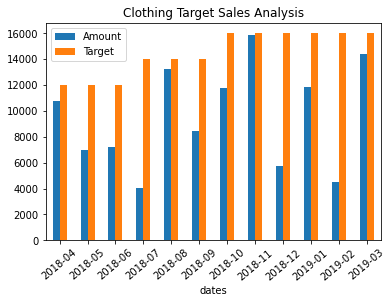

In [106]:
fig, ax = plt.subplots()
df_clothing_chart.plot.bar(x = 'dates', y = ['Amount', 'Target'], rot = 40, ax = ax)
plt.title("Clothing Target Sales Analysis")

## Electronics sales target analysis

In [107]:
electronics_df=pd.DataFrame(cat_sales_amount.groupby(['Order Date']).apply(lambda x: x[x['Category'] == 'Electronics' ]))

In [108]:
electronics_df

Order Date     Category  Amount
Order Date                                   
2018-01    1     2018-01  Electronics    7624
2018-02    4     2018-02  Electronics    3763
2018-03    7     2018-03  Electronics    3345
2018-04    10    2018-04  Electronics    8857
2018-05    13    2018-05  Electronics    8759
2018-06    16    2018-06  Electronics    6546
2018-07    19    2018-07  Electronics    6413
2018-08    22    2018-08  Electronics   16740
2018-09    25    2018-09  Electronics    5068
2018-10    28    2018-10  Electronics   15537
2018-11    31    2018-11  Electronics   10531
2018-12    34    2018-12  Electronics   11915
2019-01    37    2019-01  Electronics   22637
2019-02    40    2019-02  Electronics    6693
2019-03    43    2019-03  Electronics   15146
2019-04    46    2019-04  Electronics     727
2019-05    49    2019-05  Electronics    1616
2019-06    52    2019-06  Electronics    1711
2019-07    55    2019-07  Electronics    2427
2019-08    58    2019-08  Electronics    1582
2019-09    61    2019-09  Electronics    2941
2019-10    64    2019-10  Electronics    3251
2019-11    67    2019-11  Electronics    1292
2019-12    70    2019-12  Electronics     146

In [109]:
electronics_df['dates']=electronics_df['Order Date']

In [110]:
electronics_df

Order Date     Category  Amount    dates
Order Date                                            
2018-01    1     2018-01  Electronics    7624  2018-01
2018-02    4     2018-02  Electronics    3763  2018-02
2018-03    7     2018-03  Electronics    3345  2018-03
2018-04    10    2018-04  Electronics    8857  2018-04
2018-05    13    2018-05  Electronics    8759  2018-05
2018-06    16    2018-06  Electronics    6546  2018-06
2018-07    19    2018-07  Electronics    6413  2018-07
2018-08    22    2018-08  Electronics   16740  2018-08
2018-09    25    2018-09  Electronics    5068  2018-09
2018-10    28    2018-10  Electronics   15537  2018-10
2018-11    31    2018-11  Electronics   10531  2018-11
2018-12    34    2018-12  Electronics   11915  2018-12
2019-01    37    2019-01  Electronics   22637  2019-01
2019-02    40    2019-02  Electronics    6693  2019-02
2019-03    43    2019-03  Electronics   15146  2019-03
2019-04    46    2019-04  Electronics     727  2019-04
2019-05    49    2019-05  Electronics    1616  2019-05
2019-06    52    2019-06  Electronics    1711  2019-06
2019-07    55    2019-07  Electronics    2427  2019-07
2019-08    58    2019-08  Electronics    1582  2019-08
2019-09    61    2019-09  Electronics    2941  2019-09
2019-10    64    2019-10  Electronics    3251  2019-10
2019-11    67    2019-11  Electronics    1292  2019-11
2019-12    70    2019-12  Electronics     146  2019-12

In [111]:
electronics_df.drop(['Order Date'],axis=1,inplace=True)

In [112]:
electronics_df

Category  Amount    dates
Order Date                                 
2018-01    1   Electronics    7624  2018-01
2018-02    4   Electronics    3763  2018-02
2018-03    7   Electronics    3345  2018-03
2018-04    10  Electronics    8857  2018-04
2018-05    13  Electronics    8759  2018-05
2018-06    16  Electronics    6546  2018-06
2018-07    19  Electronics    6413  2018-07
2018-08    22  Electronics   16740  2018-08
2018-09    25  Electronics    5068  2018-09
2018-10    28  Electronics   15537  2018-10
2018-11    31  Electronics   10531  2018-11
2018-12    34  Electronics   11915  2018-12
2019-01    37  Electronics   22637  2019-01
2019-02    40  Electronics    6693  2019-02
2019-03    43  Electronics   15146  2019-03
2019-04    46  Electronics     727  2019-04
2019-05    49  Electronics    1616  2019-05
2019-06    52  Electronics    1711  2019-06
2019-07    55  Electronics    2427  2019-07
2019-08    58  Electronics    1582  2019-08
2019-09    61  Electronics    2941  2019-09
2019-10    64  Electronics    3251  2019-10
2019-11    67  Electronics    1292  2019-11
2019-12    70  Electronics     146  2019-12

In [113]:
electronics_tf=pd.DataFrame(df3.groupby(['Category']).apply(lambda x: x[x['Category'] == 'Electronics' ]))

In [114]:
electronics_tf

Category  Target target_month_year
Category                                             
Electronics 24  Electronics    9000           2018-04
            25  Electronics    9000           2018-05
            26  Electronics    9000           2018-06
            27  Electronics    9000           2018-07
            28  Electronics    9000           2018-08
            29  Electronics    9000           2018-09
            30  Electronics    9000           2018-10
            31  Electronics    9000           2018-11
            32  Electronics    9000           2018-12
            33  Electronics   16000           2019-01
            34  Electronics   16000           2019-02
            35  Electronics   16000           2019-03

In [115]:
df_merged_electronics=pd.merge(electronics_df, electronics_tf, left_on='dates',right_on='target_month_year')

In [116]:
df_electronics_chart=df_merged_electronics[['Amount','Target','dates']]

In [117]:
df_electronics_chart

Amount  Target    dates
0     8857    9000  2018-04
1     8759    9000  2018-05
2     6546    9000  2018-06
3     6413    9000  2018-07
4    16740    9000  2018-08
5     5068    9000  2018-09
6    15537    9000  2018-10
7    10531    9000  2018-11
8    11915    9000  2018-12
9    22637   16000  2019-01
10    6693   16000  2019-02
11   15146   16000  2019-03

Text(0.5, 1.0, 'Electronics Target Sales Analysis')

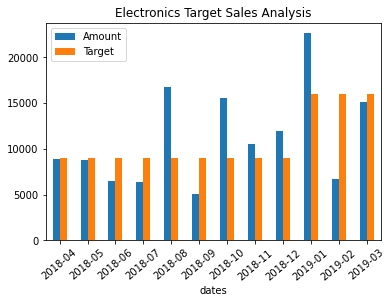

In [118]:
fig, ax = plt.subplots()
df_electronics_chart.plot.bar(x = 'dates', y = ['Amount', 'Target'], rot = 40, ax = ax)
plt.title("Electronics Target Sales Analysis")

## Furniture Sales target Analysis

In [119]:
furniture_df=pd.DataFrame(cat_sales_amount.groupby(['Order Date']).apply(lambda x: x[x['Category'] == 'Furniture' ]))

In [120]:
furniture_df

Order Date   Category  Amount
Order Date                                 
2018-01    2     2018-01  Furniture    5056
2018-02    5     2018-02  Furniture    1141
2018-03    8     2018-03  Furniture     568
2018-04    11    2018-04  Furniture    6570
2018-05    14    2018-05  Furniture    4677
2018-06    17    2018-06  Furniture    3622
2018-07    20    2018-07  Furniture    5249
2018-08    23    2018-08  Furniture   15259
2018-09    26    2018-09  Furniture    6728
2018-10    29    2018-10  Furniture    5460
2018-11    32    2018-11  Furniture   12465
2018-12    35    2018-12  Furniture    6208
2019-01    38    2019-01  Furniture   15944
2019-02    41    2019-02  Furniture    4694
2019-03    44    2019-03  Furniture   10143
2019-04    47    2019-04  Furniture    7698
2019-05    50    2019-05  Furniture    1271
2019-06    53    2019-06  Furniture     597
2019-07    56    2019-07  Furniture    1494
2019-08    59    2019-08  Furniture    2826
2019-09    62    2019-09  Furniture    1271
2019-10    65    2019-10  Furniture    7819
2019-11    68    2019-11  Furniture     421

In [121]:
furniture_df['dates']=furniture_df['Order Date']

In [122]:
furniture_df

Order Date   Category  Amount    dates
Order Date                                          
2018-01    2     2018-01  Furniture    5056  2018-01
2018-02    5     2018-02  Furniture    1141  2018-02
2018-03    8     2018-03  Furniture     568  2018-03
2018-04    11    2018-04  Furniture    6570  2018-04
2018-05    14    2018-05  Furniture    4677  2018-05
2018-06    17    2018-06  Furniture    3622  2018-06
2018-07    20    2018-07  Furniture    5249  2018-07
2018-08    23    2018-08  Furniture   15259  2018-08
2018-09    26    2018-09  Furniture    6728  2018-09
2018-10    29    2018-10  Furniture    5460  2018-10
2018-11    32    2018-11  Furniture   12465  2018-11
2018-12    35    2018-12  Furniture    6208  2018-12
2019-01    38    2019-01  Furniture   15944  2019-01
2019-02    41    2019-02  Furniture    4694  2019-02
2019-03    44    2019-03  Furniture   10143  2019-03
2019-04    47    2019-04  Furniture    7698  2019-04
2019-05    50    2019-05  Furniture    1271  2019-05
2019-06    53    2019-06  Furniture     597  2019-06
2019-07    56    2019-07  Furniture    1494  2019-07
2019-08    59    2019-08  Furniture    2826  2019-08
2019-09    62    2019-09  Furniture    1271  2019-09
2019-10    65    2019-10  Furniture    7819  2019-10
2019-11    68    2019-11  Furniture     421  2019-11

In [123]:
furniture_df.drop(['Order Date'],axis=1,inplace=True)

In [124]:
furniture_df

Category  Amount    dates
Order Date                               
2018-01    2   Furniture    5056  2018-01
2018-02    5   Furniture    1141  2018-02
2018-03    8   Furniture     568  2018-03
2018-04    11  Furniture    6570  2018-04
2018-05    14  Furniture    4677  2018-05
2018-06    17  Furniture    3622  2018-06
2018-07    20  Furniture    5249  2018-07
2018-08    23  Furniture   15259  2018-08
2018-09    26  Furniture    6728  2018-09
2018-10    29  Furniture    5460  2018-10
2018-11    32  Furniture   12465  2018-11
2018-12    35  Furniture    6208  2018-12
2019-01    38  Furniture   15944  2019-01
2019-02    41  Furniture    4694  2019-02
2019-03    44  Furniture   10143  2019-03
2019-04    47  Furniture    7698  2019-04
2019-05    50  Furniture    1271  2019-05
2019-06    53  Furniture     597  2019-06
2019-07    56  Furniture    1494  2019-07
2019-08    59  Furniture    2826  2019-08
2019-09    62  Furniture    1271  2019-09
2019-10    65  Furniture    7819  2019-10
2019-11    68  Furniture     421  2019-11

In [125]:
furniture_tf=pd.DataFrame(df3.groupby(['Category']).apply(lambda x: x[x['Category'] == 'Furniture' ]))

In [126]:
furniture_tf

Category  Target target_month_year
Category                                         
Furniture 0   Furniture   10400           2018-04
          1   Furniture   10500           2018-05
          2   Furniture   10600           2018-06
          3   Furniture   10800           2018-07
          4   Furniture   10900           2018-08
          5   Furniture   11000           2018-09
          6   Furniture   11100           2018-10
          7   Furniture   11300           2018-11
          8   Furniture   11400           2018-12
          9   Furniture   11500           2019-01
          10  Furniture   11600           2019-02
          11  Furniture   11800           2019-03

In [127]:
df_merged_furniture=pd.merge(furniture_df, furniture_tf, left_on='dates',right_on='target_month_year')

In [128]:
df_furniture_chart=df_merged_furniture[['Amount','Target','dates']]

In [129]:
df_furniture_chart

Amount  Target    dates
0     6570   10400  2018-04
1     4677   10500  2018-05
2     3622   10600  2018-06
3     5249   10800  2018-07
4    15259   10900  2018-08
5     6728   11000  2018-09
6     5460   11100  2018-10
7    12465   11300  2018-11
8     6208   11400  2018-12
9    15944   11500  2019-01
10    4694   11600  2019-02
11   10143   11800  2019-03

Text(0.5, 1.0, 'Furniture Target Sales Analysis')

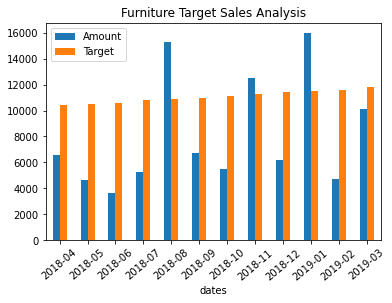

In [130]:
fig, ax = plt.subplots()
df_furniture_chart.plot.bar(x = 'dates', y = ['Amount', 'Target'], rot = 40, ax = ax)
plt.title("Furniture Target Sales Analysis")

In [86]:
tar_sales_amount

Target  Amount
target_month_year Category                   
2018-04           Clothing      12000     NaN
                  Electronics    9000     NaN
                  Furniture     10400     NaN
2018-05           Clothing      12000     NaN
                  Electronics    9000     NaN
                  Furniture     10500     NaN
2018-06           Clothing      12000     NaN
                  Electronics    9000     NaN
                  Furniture     10600     NaN
2018-07           Clothing      14000     NaN
                  Electronics    9000     NaN
                  Furniture     10800     NaN
2018-08           Clothing      14000     NaN
                  Electronics    9000     NaN
                  Furniture     10900     NaN
2018-09           Clothing      14000     NaN
                  Electronics    9000     NaN
                  Furniture     11000     NaN
2018-10           Clothing      16000     NaN
                  Electronics    9000     NaN
                  Furniture     11100     NaN
2018-11           Clothing      16000     NaN
                  Electronics    9000     NaN
                  Furniture     11300     NaN
2018-12           Clothing      16000     NaN
                  Electronics    9000     NaN
                  Furniture     11400     NaN
2019-01           Clothing      16000     NaN
                  Electronics   16000     NaN
                  Furniture     11500     NaN
2019-02           Clothing      16000     NaN
                  Electronics   16000     NaN
                  Furniture     11600     NaN
2019-03           Clothing      16000     NaN
                  Electronics   16000     NaN
                  Furniture     11800     NaN

In [157]:
tar_sales_amount['Amount']= cat_sales_amount['Amount']

In [158]:
tar_sales_amount

Target  Amount
target_month_year Category                   
2018-04           Clothing      12000   10743
                  Electronics    9000    8857
                  Furniture     10400    6570
2018-05           Clothing      12000    6986
                  Electronics    9000    8759
                  Furniture     10500    4677
2018-06           Clothing      12000    7238
                  Electronics    9000    6546
                  Furniture     10600    3622
2018-07           Clothing      14000    4020
                  Electronics    9000    6413
                  Furniture     10800    5249
2018-08           Clothing      14000   13270
                  Electronics    9000   16740
                  Furniture     10900   15259
2018-09           Clothing      14000    8414
                  Electronics    9000    5068
                  Furniture     11000    6728
2018-10           Clothing      16000   11761
                  Electronics    9000   15537
                  Furniture     11100    5460
2018-11           Clothing      16000   15862
                  Electronics    9000   10531
                  Furniture     11300   12465
2018-12           Clothing      16000    5769
                  Electronics    9000   11915
                  Furniture     11400    6208
2019-01           Clothing      16000   11867
                  Electronics   16000   22637
                  Furniture     11500   15944
2019-02           Clothing      16000    4507
                  Electronics   16000    6693
                  Furniture     11600    4694
2019-03           Clothing      16000   14411
                  Electronics   16000   15146
                  Furniture     11800   10143

#### Correlation Matrix

In [142]:
corr_matrix=pd.DataFrame(df2[['Order ID','Amount']])

In [143]:
corr_matrix=pd.merge(df1, corr_matrix, on='Order ID')

In [144]:
pd.to_datetime(corr_matrix["Order Date"],format="%Y-%m-%d")

0      2018-01-04
1      2018-01-04
2      2018-01-04
3      2018-01-04
4      2018-01-04
5      2018-01-04
6      2018-01-04
7      2018-01-04
8      2018-01-04
9      2018-03-04
10     2018-03-04
11     2018-03-04
12     2018-03-04
13     2018-03-04
14     2018-03-04
15     2018-03-04
16     2018-03-04
17     2018-03-04
18     2018-03-04
19     2018-05-04
20     2018-06-04
21     2018-06-04
22     2018-08-04
23     2018-08-04
24     2018-08-04
25     2018-08-04
26     2018-09-04
27     2018-09-04
28     2018-09-04
29     2018-09-04
30     2018-09-04
31     2018-09-04
32     2018-09-04
33     2018-09-04
34     2018-11-04
35     2018-12-04
36     2018-12-04
37     2018-04-13
38     2018-04-13
39     2018-04-15
40     2018-04-15
41     2018-04-15
42     2018-04-15
43     2018-04-15
44     2018-04-17
45     2018-04-18
46     2018-04-18
47     2018-04-18
48     2018-04-20
49     2018-04-20
50     2018-04-20
51     2018-04-20
52     2018-04-22
53     2018-04-22
54     2018-04-22
55     201

In [145]:
corr_matrix

Order ID Order Date  CustomerName              State                City  \
0     B-25601 2018-01-04        Bharat            Gujarat           Ahmedabad   
1     B-25601 2018-01-04        Bharat            Gujarat           Ahmedabad   
2     B-25601 2018-01-04        Bharat            Gujarat           Ahmedabad   
3     B-25601 2018-01-04        Bharat            Gujarat           Ahmedabad   
4     B-25602 2018-01-04         Pearl        Maharashtra                Pune   
5     B-25602 2018-01-04         Pearl        Maharashtra                Pune   
6     B-25602 2018-01-04         Pearl        Maharashtra                Pune   
7     B-25602 2018-01-04         Pearl        Maharashtra                Pune   
8     B-25602 2018-01-04         Pearl        Maharashtra                Pune   
9     B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
10    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
11    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
12    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
13    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
14    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
15    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
16    B-25603 2018-03-04         Jahan     Madhya Pradesh              Bhopal   
17    B-25604 2018-03-04        Divsha          Rajasthan              Jaipur   
18    B-25604 2018-03-04        Divsha          Rajasthan              Jaipur   
19    B-25605 2018-05-04       Kasheen        West Bengal             Kolkata   
20    B-25606 2018-06-04         Hazel          Karnataka           Bangalore   
21    B-25607 2018-06-04      Sonakshi  Jammu and Kashmir             Kashmir   
22    B-25608 2018-08-04       Aarushi         Tamil Nadu             Chennai   
23    B-25608 2018-08-04       Aarushi         Tamil Nadu             Chennai   
24    B-25608 2018-08-04       Aarushi         Tamil Nadu             Chennai   
25    B-25608 2018-08-04       Aarushi         Tamil Nadu             Chennai   
26    B-25609 2018-09-04        Jitesh      Uttar Pradesh             Lucknow   
27    B-25609 2018-09-04        Jitesh      Uttar Pradesh             Lucknow   
28    B-25610 2018-09-04        Yogesh              Bihar               Patna   
29    B-25610 2018-09-04        Yogesh              Bihar               Patna   
30    B-25610 2018-09-04        Yogesh              Bihar               Patna   
31    B-25610 2018-09-04        Yogesh              Bihar               Patna   
32    B-25610 2018-09-04        Yogesh              Bihar               Patna   
33    B-25610 2018-09-04        Yogesh              Bihar               Patna   
34    B-25611 2018-11-04         Anita            Kerala   Thiruvananthapuram   
35    B-25612 2018-12-04     Shrichand             Punjab          Chandigarh   
36    B-25613 2018-12-04        Mukesh            Haryana          Chandigarh   
37    B-25614 2018-04-13       Vandana   Himachal Pradesh               Simla   
38    B-25614 2018-04-13       Vandana   Himachal Pradesh               Simla   
39    B-25615 2018-04-15        Bhavna             Sikkim             Gangtok   
40    B-25616 2018-04-15         Kanak                Goa                 Goa   
41    B-25616 2018-04-15         Kanak                Goa                 Goa   
42    B-25616 2018-04-15         Kanak                Goa                 Goa   
43    B-25616 2018-04-15         Kanak                Goa                 Goa   
44    B-25617 2018-04-17         Sagar           Nagaland              Kohima   
45    B-25618 2018-04-18         Manju     Andhra Pradesh           Hyderabad   
46    B-25618 2018-04-18         Manju     Andhra Pradesh           Hyderabad   
47    B-25619 2018-04-18        Ramesh            Gujarat           Ahmedabad   
48    B-25620 2018-04-20        Sari

In [154]:
corr_matrix_1=pd.DataFrame(corr_matrix.groupby(['Order Date']).sum()['Amount']).reset_index()

In [155]:
corr_matrix_1

Order Date  Amount
0   2018-01-04    5318
1   2018-01-05     695
2   2018-01-06    2390
3   2018-01-07    1126
4   2018-01-08     187
5   2018-01-09    1582
6   2018-01-10    4507
7   2018-01-11      22
8   2018-01-12    2208
9   2018-02-06      20
10  2018-02-08    1359
11  2018-02-09    2757
12  2018-02-11    1543
13  2018-02-12     887
14  2018-03-04    2247
15  2018-03-05      42
16  2018-03-06     425
17  2018-03-08     731
18  2018-03-11    3725
19  2018-03-12     264
20  2018-04-05     315
21  2018-04-06    3748
22  2018-04-11     336
23  2018-04-12    4412
24  2018-04-13     592
25  2018-04-15     262
26  2018-04-17     305
27  2018-04-18     727
28  2018-04-20     987
29  2018-04-22    1025
30  2018-04-23    1995
31  2018-04-24    2259
32  2018-04-25      19
33  2018-04-26    5076
34  2018-04-27    2155
35  2018-04-28     434
36  2018-04-29    1447
37  2018-04-30      76
38  2018-05-04      75
39  2018-05-05      27
40  2018-05-07     933
41  2018-05-10    4646
42  2018-05-11    2393
43  2018-05-12     755
44  2018-05-13    1673
45  2018-05-14      27
46  2018-05-15     148
47  2018-05-16     245
48  2018-05-17    1003
49  2018-05-19     294
50  2018-05-20    1570
51  2018-05-21     166
52  2018-05-22     934
53  2018-05-23    1942
54  2018-05-24     123
55  2018-05-25    1378
56  2018-05-27     832
57  2018-05-28     329
58  2018-05-31     929
59  2018-06-04     137
60  2018-06-05    2810
61  2018-06-07     100
62  2018-06-09     790
63  2018-06-10     632
64  2018-06-11    1383
65  2018-06-12     834
66  2018-06-14     715
67  2018-06-15      31
68  2018-06-16     806
69  2018-06-17     141
70  2018-06-18    1313
71  2018-06-21    1607
72  2018-06-22    1995
73  2018-06-23     909
74  2018-06-24     124
75  2018-06-25     180
76  2018-06-26     174
77  2018-06-27    1777
78  2018-06-28     674
79  2018-06-29     228
80  2018-06-30      46
81  2018-07-05    1802
82  2018-07-06     545
83  2018-07-07     193
84  2018-07-08     785
85  2018-07-09      38
86  2018-07-10      16
87  2018-07-11    1510
88  2018-07-12    2866
89  2018-07-15      30
90  2018-07-16     369
91  2018-07-17      48
92  2018-07-18     130
93  2018-07-19     168
94  2018-07-20     193
95  2018-07-21     490
96  2018-07-22    6083
97  2018-07-26     131
98  2018-07-27      16
99  2018-07-28      96
100 2018-07-29     108
101 2018-07-30      34
102 2018-07-31      31
103 2018-08-04    2953
104 2018-08-05    4927
105 2018-08-06    1067
106 2018-08-07     158
107 2018-08-08     373
108 2018-08-09      50
109 2018-08-10     478
110 2018-08-11    9386
111 2018-08-12     939
112 2018-08-13    1052
113 2018-08-14    5414
114 2018-08-17    1500
115 2018-08-18     845
116 2018-08-19    3205
117 2018-08-20    2070
118 2018-08-21    3912
119 2018-08-22       8
120 2018-08-23      20
121 2018-08-24     322
122 2018-08-25    3339
123 2018-08-26    1441
124 2018-08-27      58
125 2018-08-28     934
126 2018-08-29     139
127 2018-08-30     220
128 2018-08-31     459
129 2018-09-04    2615
130 2018-09-06     134
131 2018-09-07     351
132 2018-09-08    1142
133 2018-09-09      47
134 2018-09-10     207
135 2018-09-12     365
136 2018-09-13     137
137 2018-09-14    1511
138 2018-09-15    1343
139 2018-09-19    2538
140 2018-09-20     965
141 2018-09-21      12
142 2018-09-22     410
143 2018-09-23      42
144 2018-09-24    5104
145 2018-09-30    3287
146 2018-10-05    1384
147 2018-10-06     889
148 2018-10-07     416
149 2018-10-08      87
150 2018-10-09    1382
151 2018-10-10    3530
152 2018-10-11    2227
153 2018-10-12    5635
154 2018-10-13     743
155 2018-10-14     265
156 2018-10-15     417
157 2018-10-16     321
158 2018-10-18    2403
159 2018-10-20     101
160 2018-10-21    1166
161 2018-10-22     637
162 2018-10-23     156
163 2018-10-24     902
164 2018-10-25     345
165 2018-10-26    3276
166 2018-10-27     693
167 2018-10-28     504
168 2018-10-29    3223
169 2018-10-30    1250
170 2018-10-31     806
171 2018-11-04     160
172 2018-11-05    4950
17

In [161]:
corr_matrix_1['Order Day']=corr_matrix_1['Order Date'].dt.day

In [162]:
corr_matrix_1

Order Date  Amount  Order Month  Order Day
0   2018-01-04    5318            4          4
1   2018-01-05     695            5          5
2   2018-01-06    2390            6          6
3   2018-01-07    1126            7          7
4   2018-01-08     187            8          8
5   2018-01-09    1582            9          9
6   2018-01-10    4507           10         10
7   2018-01-11      22           11         11
8   2018-01-12    2208           12         12
9   2018-02-06      20            6          6
10  2018-02-08    1359            8          8
11  2018-02-09    2757            9          9
12  2018-02-11    1543           11         11
13  2018-02-12     887           12         12
14  2018-03-04    2247            4          4
15  2018-03-05      42            5          5
16  2018-03-06     425            6          6
17  2018-03-08     731            8          8
18  2018-03-11    3725           11         11
19  2018-03-12     264           12         12
20  2018-04-05     315            5          5
21  2018-04-06    3748            6          6
22  2018-04-11     336           11         11
23  2018-04-12    4412           12         12
24  2018-04-13     592           13         13
25  2018-04-15     262           15         15
26  2018-04-17     305           17         17
27  2018-04-18     727           18         18
28  2018-04-20     987           20         20
29  2018-04-22    1025           22         22
30  2018-04-23    1995           23         23
31  2018-04-24    2259           24         24
32  2018-04-25      19           25         25
33  2018-04-26    5076           26         26
34  2018-04-27    2155           27         27
35  2018-04-28     434           28         28
36  2018-04-29    1447           29         29
37  2018-04-30      76           30         30
38  2018-05-04      75            4          4
39  2018-05-05      27            5          5
40  2018-05-07     933            7          7
41  2018-05-10    4646           10         10
42  2018-05-11    2393           11         11
43  2018-05-12     755           12         12
44  2018-05-13    1673           13         13
45  2018-05-14      27           14         14
46  2018-05-15     148           15         15
47  2018-05-16     245           16         16
48  2018-05-17    1003           17         17
49  2018-05-19     294           19         19
50  2018-05-20    1570           20         20
51  2018-05-21     166           21         21
52  2018-05-22     934           22         22
53  2018-05-23    1942           23         23
54  2018-05-24     123           24         24
55  2018-05-25    1378           25         25
56  2018-05-27     832           27         27
57  2018-05-28     329           28         28
58  2018-05-31     929           31         31
59  2018-06-04     137            4          4
60  2018-06-05    2810            5          5
61  2018-06-07     100            7          7
62  2018-06-09     790            9          9
63  2018-06-10     632           10         10
64  2018-06-11    1383           11         11
65  2018-06-12     834           12         12
66  2018-06-14     715           14         14
67  2018-06-15      31           15         15
68  2018-06-16     806           16         16
69  2018-06-17     141           17         17
70  2018-06-18    1313           18         18
71  2018-06-21    1607           21         21
72  2018-06-22    1995           22         22
73  2018-06-23     909           23         23
74  2018-06-24     124           24         24
75  2018-06-25     180           25         25
76  2018-06-26     174           26         26
77  2018-06-27    1777           27         27
78  2018-06-28     674           28         28
79  2018-06-29     228           29         29
80  2018-06-30      46           30         30
81  2018-07-05    1802            5          5
82  2018-07-06     545            6          6
83  2018-07-07     193            7          7
84  2018-

In [165]:
corr_matrix_1.drop(['Order Month'],axis=1,inplace=True)

In [166]:
corr_matrix_1['Order Month']=corr_matrix_1['Order Date'].dt.month

In [167]:
corr_matrix_1

Order Date  Amount  Order Day  Order Month
0   2018-01-04    5318          4            1
1   2018-01-05     695          5            1
2   2018-01-06    2390          6            1
3   2018-01-07    1126          7            1
4   2018-01-08     187          8            1
5   2018-01-09    1582          9            1
6   2018-01-10    4507         10            1
7   2018-01-11      22         11            1
8   2018-01-12    2208         12            1
9   2018-02-06      20          6            2
10  2018-02-08    1359          8            2
11  2018-02-09    2757          9            2
12  2018-02-11    1543         11            2
13  2018-02-12     887         12            2
14  2018-03-04    2247          4            3
15  2018-03-05      42          5            3
16  2018-03-06     425          6            3
17  2018-03-08     731          8            3
18  2018-03-11    3725         11            3
19  2018-03-12     264         12            3
20  2018-04-05     315          5            4
21  2018-04-06    3748          6            4
22  2018-04-11     336         11            4
23  2018-04-12    4412         12            4
24  2018-04-13     592         13            4
25  2018-04-15     262         15            4
26  2018-04-17     305         17            4
27  2018-04-18     727         18            4
28  2018-04-20     987         20            4
29  2018-04-22    1025         22            4
30  2018-04-23    1995         23            4
31  2018-04-24    2259         24            4
32  2018-04-25      19         25            4
33  2018-04-26    5076         26            4
34  2018-04-27    2155         27            4
35  2018-04-28     434         28            4
36  2018-04-29    1447         29            4
37  2018-04-30      76         30            4
38  2018-05-04      75          4            5
39  2018-05-05      27          5            5
40  2018-05-07     933          7            5
41  2018-05-10    4646         10            5
42  2018-05-11    2393         11            5
43  2018-05-12     755         12            5
44  2018-05-13    1673         13            5
45  2018-05-14      27         14            5
46  2018-05-15     148         15            5
47  2018-05-16     245         16            5
48  2018-05-17    1003         17            5
49  2018-05-19     294         19            5
50  2018-05-20    1570         20            5
51  2018-05-21     166         21            5
52  2018-05-22     934         22            5
53  2018-05-23    1942         23            5
54  2018-05-24     123         24            5
55  2018-05-25    1378         25            5
56  2018-05-27     832         27            5
57  2018-05-28     329         28            5
58  2018-05-31     929         31            5
59  2018-06-04     137          4            6
60  2018-06-05    2810          5            6
61  2018-06-07     100          7            6
62  2018-06-09     790          9            6
63  2018-06-10     632         10            6
64  2018-06-11    1383         11            6
65  2018-06-12     834         12            6
66  2018-06-14     715         14            6
67  2018-06-15      31         15            6
68  2018-06-16     806         16            6
69  2018-06-17     141         17            6
70  2018-06-18    1313         18            6
71  2018-06-21    1607         21            6
72  2018-06-22    1995         22            6
73  2018-06-23     909         23            6
74  2018-06-24     124         24            6
75  2018-06-25     180         25            6
76  2018-06-26     174         26            6
77  2018-06-27    1777         27            6
78  2018-06-28     674         28            6
79  2018-06-29     228         29            6
80  2018-06-30      46         30            6
81  2018-07-05    1802          5            7
82  2018-07-06     545          6            7
83  2018-07-07     193          7            7
84  2018-

In [168]:
corr_matrix_1.drop(['Order Date'],axis=1,inplace=True)

In [169]:
corr_matrix_1

Amount  Order Day  Order Month
0      5318          4            1
1       695          5            1
2      2390          6            1
3      1126          7            1
4       187          8            1
5      1582          9            1
6      4507         10            1
7        22         11            1
8      2208         12            1
9        20          6            2
10     1359          8            2
11     2757          9            2
12     1543         11            2
13      887         12            2
14     2247          4            3
15       42          5            3
16      425          6            3
17      731          8            3
18     3725         11            3
19      264         12            3
20      315          5            4
21     3748          6            4
22      336         11            4
23     4412         12            4
24      592         13            4
25      262         15            4
26      305         17            4
27      727         18            4
28      987         20            4
29     1025         22            4
30     1995         23            4
31     2259         24            4
32       19         25            4
33     5076         26            4
34     2155         27            4
35      434         28            4
36     1447         29            4
37       76         30            4
38       75          4            5
39       27          5            5
40      933          7            5
41     4646         10            5
42     2393         11            5
43      755         12            5
44     1673         13            5
45       27         14            5
46      148         15            5
47      245         16            5
48     1003         17            5
49      294         19            5
50     1570         20            5
51      166         21            5
52      934         22            5
53     1942         23            5
54      123         24            5
55     1378         25            5
56      832         27            5
57      329         28            5
58      929         31            5
59      137          4            6
60     2810          5            6
61      100          7            6
62      790          9            6
63      632         10            6
64     1383         11            6
65      834         12            6
66      715         14            6
67       31         15            6
68      806         16            6
69      141         17            6
70     1313         18            6
71     1607         21            6
72     1995         22            6
73      909         23            6
74      124         24            6
75      180         25            6
76      174         26            6
77     1777         27            6
78      674         28            6
79      228         29            6
80       46         30            6
81     1802          5            7
82      545          6            7
83      193          7            7
84      785          8            7
85       38          9            7
86       16         10            7
87     1510         11            7
88     2866         12            7
89       30         15            7
90      369         16            7
91       48         17            7
92      130         18            7
93      168         19            7
94      193         20            7
95      490         21            7
96     6083         22            7
97      131         26            7
98       16         27            7
99       96         28            7
100     108         29            7
101      34         30            7
102      31         31            7
103    2953          4            8
104    4927          5            8
105    1067          6            8
106     158          7            8
107     373          8            8
108      50          9            8
109     478         10            8
110    93

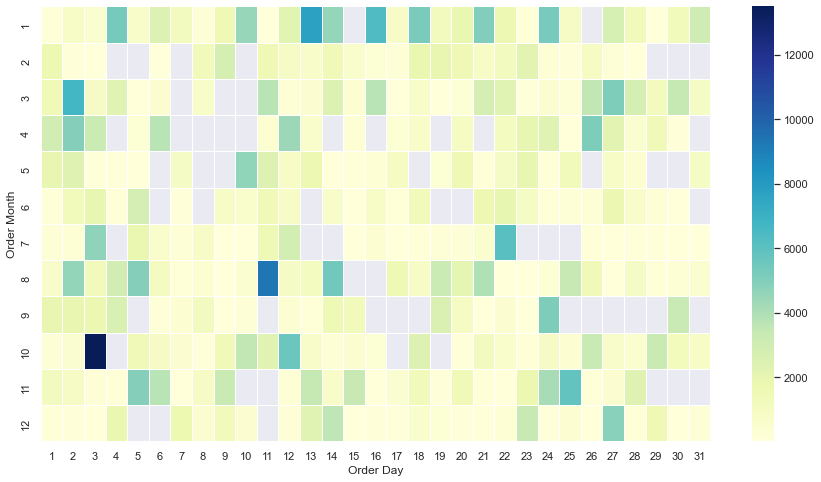

In [179]:
flights = corr_matrix_1.pivot("Order Month", "Order Day", "Amount")
sb.set(rc = {'figure.figsize':(15,8)})
ax = sb.heatmap(flights,linewidths=.5,cmap="YlGnBu")

## Additional Analysis

In [182]:
top_SubCategory = df2.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
top_SubCategory = top_SubCategory.reset_index()

In [183]:
top_SubCategory

Sub-Category  Profit
0     Printers    5964
1    Bookcases    4888
2  Accessories    3559
3     Trousers    2847
4        Stole    2559
5       Phones    2207
6  Hankerchief    2098
7      T-shirt    1500
8        Shirt    1131
9  Furnishings     844

In [184]:
top_customers = df2.groupby('Order ID')['Profit'].sum().sort_values(ascending=False).head(10)
top_customers = top_customers.reset_index()

In [185]:
top_customers

Order ID  Profit
0  B-25973    1970
1  B-25855    1432
2  B-25656    1021
3  B-26093    1020
4  B-25761     984
5  B-25602     975
6  B-25853     970
7  B-25923     966
8  B-26051     906
9  B-26073     889

In [192]:
# No. of Orders made by each customer
customer_df = df2.groupby(['Order ID']).sum()['Quantity'].reset_index()
customer_df

Order ID  Quantity
0    B-25601        19
1    B-25602        22
2    B-25603        25
3    B-25604        11
4    B-25605         7
5    B-25606         2
6    B-25607         4
7    B-25608        19
8    B-25609         8
9    B-25610        24
10   B-25611         2
11   B-25612         2
12   B-25613         9
13   B-25614         6
14   B-25615         5
15   B-25616        16
16   B-25617         5
17   B-25618         3
18   B-25619         8
19   B-25620         1
20   B-25621        11
21   B-25622         3
22   B-25623        13
23   B-25624         3
24   B-25625        10
25   B-25626         4
26   B-25627         4
27   B-25628        10
28   B-25629         3
29   B-25630        21
30   B-25631         2
31   B-25632         2
32   B-25633        10
33   B-25634         3
34   B-25635         8
35   B-25636         5
36   B-25637         3
37   B-25638        17
38   B-25639         3
39   B-25640        19
40   B-25641         1
41   B-25642        11
42   B-25643        17
43   B-25644         8
44   B-25645        14
45   B-25646         2
46   B-25647         4
47   B-25648        10
48   B-25649         2
49   B-25650        31
50   B-25651        28
51   B-25652        27
52   B-25653        45
53   B-25654        21
54   B-25655        39
55   B-25656        43
56   B-25657        19
57   B-25658         2
58   B-25659         7
59   B-25660         3
60   B-25661        17
61   B-25662        14
62   B-25663         2
63   B-25664         9
64   B-25665         4
65   B-25666         7
66   B-25667        24
67   B-25668         3
68   B-25669         2
69   B-25670         8
70   B-25671         3
71   B-25672         1
72   B-25673        18
73   B-25674         5
74   B-25675         9
75   B-25676        18
76   B-25677         1
77   B-25678         8
78   B-25679         1
79   B-25680         3
80   B-25681        23
81   B-25682        11
82   B-25683        21
83   B-25684         2
84   B-25685        12
85   B-25686        11
86   B-25687        15
87   B-25688         5
88   B-25689         8
89   B-25690         3
90   B-25691        10
91   B-25692         7
92   B-25693        30
93   B-25694         7
94   B-25695         9
95   B-25696        17
96   B-25697        24
97   B-25698        23
98   B-25699         9
99   B-25700        10
100  B-25701        12
101  B-25702        22
102  B-25703        39
103  B-25704         6
104  B-25705         2
105  B-25706         4
106  B-25707         1
107  B-25708        22
108  B-25709         8
109  B-25710        23
110  B-25711         4
111  B-25712         3
112  B-25713         4
113  B-25714         9
114  B-25715         3
115  B-25716         4
116  B-25717        13
117  B-25718         4
118  B-25719         2
119  B-25720         1
120  B-25721        14
121  B-25722         8
122  B-25723         8
123  B-25724         2
124  B-25725        13
125  B-25726         8
126  B-25727        10
127  B-25728        10
128  B-25729         4
129  B-25730        21
130  B-25731         8
131  B-25732         2
132  B-25733        13
133  B-25734         3
134  B-25735         6
135  B-25736         5
136  B-25737         3
137  B-25738        13
138  B-25739         2
139  B-25740         7
140  B-25741         7
141  B-25742         2
142  B-25743        15
143  B-25744         6
144  B-25745        24
145  B-25746         2
146  B-25747         2
147  B-25748        11
148  B-25749         3
149  B-25750        32
150  B-25751        25
151  B-25752        38
152  B-25753        47
153  B-25754        31
154  B-25755        28
155  B-25756        18
156  B-25757        47
157  B-25758         1
158  B-25759         6
159  B-25760         5
160  B-25761        28
161  B-25762        12
162  B-25763         3
163  B-25764        11
164  B-25765         3
165  B-25766         2
166  B-25767        12
167  B-25768         6
168  B-25769         2
169  B-25770        18
170  B-25771         3
171  B-25772         4
172  B-25773        14
17

In [194]:
# Earliest Order made by the customer

first_order_df = df_merged.groupby('Order ID', as_index=False)['Order Date'].min()
first_order_df.columns = ['Order ID', 'First Ordered']
first_order_df.set_index('Order ID', inplace=True)

customer_df = customer_df.merge(first_order_df, on ='Order ID' ).copy()

In [195]:
customer_df

Order ID  Quantity First Ordered
0    B-25601        19    2018-01-04
1    B-25602        22    2018-01-04
2    B-25603        25    2018-03-04
3    B-25604        11    2018-03-04
4    B-25605         7    2018-05-04
5    B-25606         2    2018-06-04
6    B-25607         4    2018-06-04
7    B-25608        19    2018-08-04
8    B-25609         8    2018-09-04
9    B-25610        24    2018-09-04
10   B-25611         2    2018-11-04
11   B-25612         2    2018-12-04
12   B-25613         9    2018-12-04
13   B-25614         6    2018-04-13
14   B-25615         5    2018-04-15
15   B-25616        16    2018-04-15
16   B-25617         5    2018-04-17
17   B-25618         3    2018-04-18
18   B-25619         8    2018-04-18
19   B-25620         1    2018-04-20
20   B-25621        11    2018-04-20
21   B-25622         3    2018-04-22
22   B-25623        13    2018-04-22
23   B-25624         3    2018-04-22
24   B-25625        10    2018-04-23
25   B-25626         4    2018-04-23
26   B-25627         4    2018-04-23
27   B-25628        10    2018-04-24
28   B-25629         3    2018-04-24
29   B-25630        21    2018-04-24
30   B-25631         2    2018-04-24
31   B-25632         2    2018-04-25
32   B-25633        10    2018-04-26
33   B-25634         3    2018-04-26
34   B-25635         8    2018-04-26
35   B-25636         5    2018-04-26
36   B-25637         3    2018-04-26
37   B-25638        17    2018-04-26
38   B-25639         3    2018-04-27
39   B-25640        19    2018-04-27
40   B-25641         1    2018-04-27
41   B-25642        11    2018-04-28
42   B-25643        17    2018-04-29
43   B-25644         8    2018-04-30
44   B-25645        14    2018-01-05
45   B-25646         2    2018-01-05
46   B-25647         4    2018-03-05
47   B-25648        10    2018-04-05
48   B-25649         2    2018-05-05
49   B-25650        31    2018-06-05
50   B-25651        28    2018-07-05
51   B-25652        27    2018-08-05
52   B-25653        45    2018-08-05
53   B-25654        21    2018-10-05
54   B-25655        39    2018-11-05
55   B-25656        43    2018-11-05
56   B-25657        19    2018-05-13
57   B-25658         2    2018-05-14
58   B-25659         7    2018-05-15
59   B-25660         3    2018-05-16
60   B-25661        17    2018-05-17
61   B-25662        14    2018-05-17
62   B-25663         2    2018-05-19
63   B-25664         9    2018-05-20
64   B-25665         4    2018-05-21
65   B-25666         7    2018-05-22
66   B-25667        24    2018-05-23
67   B-25668         3    2018-05-24
68   B-25669         2    2018-05-25
69   B-25670         8    2018-05-25
70   B-25671         3    2018-05-27
71   B-25672         1    2018-05-28
72   B-25673        18    2018-05-28
73   B-25674         5    2018-05-28
74   B-25675         9    2018-05-31
75   B-25676        18    2018-01-06
76   B-25677         1    2018-02-06
77   B-25678         8    2018-03-06
78   B-25679         1    2018-04-06
79   B-25680         3    2018-04-06
80   B-25681        23    2018-04-06
81   B-25682        11    2018-07-06
82   B-25683        21    2018-08-06
83   B-25684         2    2018-09-06
84   B-25685        12    2018-10-06
85   B-25686        11    2018-11-06
86   B-25687        15    2018-11-06
87   B-25688         5    2018-11-06
88   B-25689         8    2018-06-14
89   B-25690         3    2018-06-15
90   B-25691        10    2018-06-16
91   B-25692         7    2018-06-17
92   B-25693        30    2018-06-18
93   B-25694         7    2018-06-18
94   B-25695         9    2018-06-18
95   B-25696        17    2018-06-21
96   B-25697        24    2018-06-22
97   B-25698        23    2018-06-23
98   B-25699         9    2018-06-24
99   B-25700        10    2018-06-25
100  B-25701        12    2018-06-26
101  B-25702        22    2018-06-27
102  B-25703        39    2018-06-28
103  B-25704         6    2018-06-29
104  B-25705         2    2018-06-30
105  B-25706         4    2018-01-07
106  B-25707         1    2018-01-07
107  B-2

In [196]:
# No. of days as customer

customer_df['Days as Customer'] = ((customer_df['First Ordered'].max() - customer_df['First Ordered']).astype('timedelta64[D]')).astype('int')

In [197]:
customer_df

Order ID  Quantity First Ordered  Days as Customer
0    B-25601        19    2018-01-04               698
1    B-25602        22    2018-01-04               698
2    B-25603        25    2018-03-04               639
3    B-25604        11    2018-03-04               639
4    B-25605         7    2018-05-04               578
5    B-25606         2    2018-06-04               547
6    B-25607         4    2018-06-04               547
7    B-25608        19    2018-08-04               486
8    B-25609         8    2018-09-04               455
9    B-25610        24    2018-09-04               455
10   B-25611         2    2018-11-04               394
11   B-25612         2    2018-12-04               364
12   B-25613         9    2018-12-04               364
13   B-25614         6    2018-04-13               599
14   B-25615         5    2018-04-15               597
15   B-25616        16    2018-04-15               597
16   B-25617         5    2018-04-17               595
17   B-25618         3    2018-04-18               594
18   B-25619         8    2018-04-18               594
19   B-25620         1    2018-04-20               592
20   B-25621        11    2018-04-20               592
21   B-25622         3    2018-04-22               590
22   B-25623        13    2018-04-22               590
23   B-25624         3    2018-04-22               590
24   B-25625        10    2018-04-23               589
25   B-25626         4    2018-04-23               589
26   B-25627         4    2018-04-23               589
27   B-25628        10    2018-04-24               588
28   B-25629         3    2018-04-24               588
29   B-25630        21    2018-04-24               588
30   B-25631         2    2018-04-24               588
31   B-25632         2    2018-04-25               587
32   B-25633        10    2018-04-26               586
33   B-25634         3    2018-04-26               586
34   B-25635         8    2018-04-26               586
35   B-25636         5    2018-04-26               586
36   B-25637         3    2018-04-26               586
37   B-25638        17    2018-04-26               586
38   B-25639         3    2018-04-27               585
39   B-25640        19    2018-04-27               585
40   B-25641         1    2018-04-27               585
41   B-25642        11    2018-04-28               584
42   B-25643        17    2018-04-29               583
43   B-25644         8    2018-04-30               582
44   B-25645        14    2018-01-05               697
45   B-25646         2    2018-01-05               697
46   B-25647         4    2018-03-05               638
47   B-25648        10    2018-04-05               607
48   B-25649         2    2018-05-05               577
49   B-25650        31    2018-06-05               546
50   B-25651        28    2018-07-05               516
51   B-25652        27    2018-08-05               485
52   B-25653        45    2018-08-05               485
53   B-25654        21    2018-10-05               424
54   B-25655        39    2018-11-05               393
55   B-25656        43    2018-11-05               393
56   B-25657        19    2018-05-13               569
57   B-25658         2    2018-05-14               568
58   B-25659         7    2018-05-15               567
59   B-25660         3    2018-05-16               566
60   B-25661        17    2018-05-17               565
61   B-25662        14    2018-05-17               565
62   B-25663         2    2018-05-19               563
63   B-25664         9    2018-05-20               562
64   B-25665         4    2018-05-21               561
65   B-25666         7    2018-05-22               560
66   B-25667        24    2018-05-23               559
67   B-25668         3    2018-05-24               558
68   B-25669         2    2018-05-25               557
69   B-25670         8    2018-05-25               557
70   B-25671         3    2018-05-27               555
71   B-25672         1    2018-05-28        

In [198]:
# Last Order made by the customer

last_order_df = df_merged.groupby('Order ID', as_index=False)['Order Date'].max()
last_order_df.columns = ['Order ID', 'Last Ordered']
last_order_df.set_index('Order ID', inplace=True)

customer_df = customer_df.merge(last_order_df, on='Order ID' ).copy()

In [199]:
customer_df

Order ID  Quantity First Ordered  Days as Customer Last Ordered
0    B-25601        19    2018-01-04               698   2018-01-04
1    B-25602        22    2018-01-04               698   2018-01-04
2    B-25603        25    2018-03-04               639   2018-03-04
3    B-25604        11    2018-03-04               639   2018-03-04
4    B-25605         7    2018-05-04               578   2018-05-04
5    B-25606         2    2018-06-04               547   2018-06-04
6    B-25607         4    2018-06-04               547   2018-06-04
7    B-25608        19    2018-08-04               486   2018-08-04
8    B-25609         8    2018-09-04               455   2018-09-04
9    B-25610        24    2018-09-04               455   2018-09-04
10   B-25611         2    2018-11-04               394   2018-11-04
11   B-25612         2    2018-12-04               364   2018-12-04
12   B-25613         9    2018-12-04               364   2018-12-04
13   B-25614         6    2018-04-13               599   2018-04-13
14   B-25615         5    2018-04-15               597   2018-04-15
15   B-25616        16    2018-04-15               597   2018-04-15
16   B-25617         5    2018-04-17               595   2018-04-17
17   B-25618         3    2018-04-18               594   2018-04-18
18   B-25619         8    2018-04-18               594   2018-04-18
19   B-25620         1    2018-04-20               592   2018-04-20
20   B-25621        11    2018-04-20               592   2018-04-20
21   B-25622         3    2018-04-22               590   2018-04-22
22   B-25623        13    2018-04-22               590   2018-04-22
23   B-25624         3    2018-04-22               590   2018-04-22
24   B-25625        10    2018-04-23               589   2018-04-23
25   B-25626         4    2018-04-23               589   2018-04-23
26   B-25627         4    2018-04-23               589   2018-04-23
27   B-25628        10    2018-04-24               588   2018-04-24
28   B-25629         3    2018-04-24               588   2018-04-24
29   B-25630        21    2018-04-24               588   2018-04-24
30   B-25631         2    2018-04-24               588   2018-04-24
31   B-25632         2    2018-04-25               587   2018-04-25
32   B-25633        10    2018-04-26               586   2018-04-26
33   B-25634         3    2018-04-26               586   2018-04-26
34   B-25635         8    2018-04-26               586   2018-04-26
35   B-25636         5    2018-04-26               586   2018-04-26
36   B-25637         3    2018-04-26               586   2018-04-26
37   B-25638        17    2018-04-26               586   2018-04-26
38   B-25639         3    2018-04-27               585   2018-04-27
39   B-25640        19    2018-04-27               585   2018-04-27
40   B-25641         1    2018-04-27               585   2018-04-27
41   B-25642        11    2018-04-28               584   2018-04-28
42   B-25643        17    2018-04-29               583   2018-04-29
43   B-25644         8    2018-04-30               582   2018-04-30
44   B-25645        14    2018-01-05               697   2018-01-05
45   B-25646         2    2018-01-05               697   2018-01-05
46   B-25647         4    2018-03-05               638   2018-03-05
47   B-25648        10    2018-04-05               607   2018-04-05
48   B-25649         2    2018-05-05               577   2018-05-05
49   B-25650        31    2018-06-05               546   2018-06-05
50   B-25651        28    2018-07-05               516   2018-07-05
51   B-25652        27    2018-08-05               485   2018-08-05
52   B-25653        45    2018-08-05               485   2018-08-05
53   B-25654        21    2018-10-05               424   2018-10-05
54   B-25655        39    2018-11-05               393   2018-11-05
55   B-25656        43    2018-11-05               393   2018-11-05
56   B-25657        19    2018-05-13               569   2018-05-13
57   B-25658         2    2018-05-14               568   201

In [200]:
# Total Spends
total_spends_df = (df2.groupby('Order ID')['Amount'].sum())
customer_df = customer_df.merge(total_spends_df, on='Order ID').copy()
customer_df.rename(columns={'Amount': 'Total Spend'}, inplace=True)

In [201]:
customer_df

Order ID  Quantity First Ordered  Days as Customer Last Ordered  \
0    B-25601        19    2018-01-04               698   2018-01-04   
1    B-25602        22    2018-01-04               698   2018-01-04   
2    B-25603        25    2018-03-04               639   2018-03-04   
3    B-25604        11    2018-03-04               639   2018-03-04   
4    B-25605         7    2018-05-04               578   2018-05-04   
5    B-25606         2    2018-06-04               547   2018-06-04   
6    B-25607         4    2018-06-04               547   2018-06-04   
7    B-25608        19    2018-08-04               486   2018-08-04   
8    B-25609         8    2018-09-04               455   2018-09-04   
9    B-25610        24    2018-09-04               455   2018-09-04   
10   B-25611         2    2018-11-04               394   2018-11-04   
11   B-25612         2    2018-12-04               364   2018-12-04   
12   B-25613         9    2018-12-04               364   2018-12-04   
13   B-25614         6    2018-04-13               599   2018-04-13   
14   B-25615         5    2018-04-15               597   2018-04-15   
15   B-25616        16    2018-04-15               597   2018-04-15   
16   B-25617         5    2018-04-17               595   2018-04-17   
17   B-25618         3    2018-04-18               594   2018-04-18   
18   B-25619         8    2018-04-18               594   2018-04-18   
19   B-25620         1    2018-04-20               592   2018-04-20   
20   B-25621        11    2018-04-20               592   2018-04-20   
21   B-25622         3    2018-04-22               590   2018-04-22   
22   B-25623        13    2018-04-22               590   2018-04-22   
23   B-25624         3    2018-04-22               590   2018-04-22   
24   B-25625        10    2018-04-23               589   2018-04-23   
25   B-25626         4    2018-04-23               589   2018-04-23   
26   B-25627         4    2018-04-23               589   2018-04-23   
27   B-25628        10    2018-04-24               588   2018-04-24   
28   B-25629         3    2018-04-24               588   2018-04-24   
29   B-25630        21    2018-04-24               588   2018-04-24   
30   B-25631         2    2018-04-24               588   2018-04-24   
31   B-25632         2    2018-04-25               587   2018-04-25   
32   B-25633        10    2018-04-26               586   2018-04-26   
33   B-25634         3    2018-04-26               586   2018-04-26   
34   B-25635         8    2018-04-26               586   2018-04-26   
35   B-25636         5    2018-04-26               586   2018-04-26   
36   B-25637         3    2018-04-26               586   2018-04-26   
37   B-25638        17    2018-04-26               586   2018-04-26   
38   B-25639         3    2018-04-27               585   2018-04-27   
39   B-25640        19    2018-04-27               585   2018-04-27   
40   B-25641         1    2018-04-27               585   2018-04-27   
41   B-25642        11    2018-04-28               584   2018-04-28   
42   B-25643        17    2018-04-29               583   2018-04-29   
43   B-25644         8    2018-04-30               582   2018-04-30   
44   B-25645        14    2018-01-05               697   2018-01-05   
45   B-25646         2    2018-01-05               697   2018-01-05   
46   B-25647         4    2018-03-05               638   2018-03-05   
47   B-25648        10    2018-04-05               607   2018-04-05   
48   B-25649         2    2018-05-05               577   2018-05-05   
49   B-25650        31    2018-06-05               546   2018-06-05   
50   B-25651        28    2018-07-05               516   2018-07-05   
51   B-25652        27    2018-08-05               485   2018-08-05   
52   B-25653        45    2018-08-05               485   2018-08-05   
53   B-25654        21    2018-10-05               424   2018-10-05   
54   B-25655        39    2018-11-05               393   2018-11-05   
55   B-25656        43    20